## Скачивание и загрузка данных

#### **Данные представлены в нескольких форматах и расположены по ссылке: https://www.linkedomics.org/data_download/TCGA-PRAD/**
Форматы данных:
- tsi - Mixed data matrix file
- cct - continuous data matrix file
- cbt - binary data matrix file
- cgt - categorical data matrix file

Все, кроме нескольких наборов данных в формате cct - легче скачивать через !wget, файлы формата cct представлены архивом (кроме miRNA).

Наборы данных:
- Clinical: Клинические данные необходимы для обучения моделей и оценки их эффективности.

- miRNA (Gene level): Данные об экспрессии miRNA могут быть использованы для выявления регуляторных механизмов и маркеров, связанных с развитием и прогрессированием РПЖ.

- RNAseq (HiSeq, Gene level): Данные RNAseq предоставляют информацию об экспрессии генов, что позволяет выявлять гены, связанные с РПЖ, и строить прогностические модели.

- Mutation (Gene level): Данные о соматических мутациях на уровне генов позволяют определить генетические изменения, связанные с РПЖ, и использовать их в качестве биомаркеров.

- SCNV (Gene level, log-ratio): Данные об изменениях числа копий генов (copy number variations) могут быть использованы для выявления генетических аберраций, связанных с РПЖ.

In [ ]:
# Скачивание клинических данных
!wget https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__MS__Clinical__Clinical__01_28_2016__BI__Clinical__Firehose.tsi -O Clinical.tsi

# Скачивание miRNA данных
!wget https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__BDGSC__miRNASeq__HS_miR__01_28_2016__BI__Gene__Firehose_RPM_log2.cct -O miRNA.cct

# Скачивание Mutation данных
!wget https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__WUSM__Mutation__GAIIx__01_28_2016__BI__Gene__Firehose_MutSig2CV.cbt -O mutation.cbt

--2025-04-06 15:51:24--  https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__MS__Clinical__Clinical__01_28_2016__BI__Clinical__Firehose.tsi
Resolving linkedomics.org (linkedomics.org)... 52.37.41.236
Connecting to linkedomics.org (linkedomics.org)|52.37.41.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51087 (50K)
Saving to: ‘Clinical.tsi’

Clinical.tsi        100%[===================>]  49.89K  --.-KB/s    in 0.1s    

2025-04-06 15:51:25 (356 KB/s) - ‘Clinical.tsi’ saved [51087/51087]

--2025-04-06 15:51:25--  https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__BDGSC__miRNASeq__HS_miR__01_28_2016__BI__Gene__Firehose_RPM_log2.cct
Resolving linkedomics.org (linkedomics.org)... 52.37.41.236
Connecting to linkedomics.org (linkedomics.org)|52.37.41.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1829326 (1.7M)
Saving to: ‘miRNA.cct’

miRNA.cct           100%[===================>]   1.74M  3.49MB/s    

In [ ]:
import pandas as pd
import io
import requests

# Функция для чтения .tsi, .cct, .cbt файлов
def read_data(file_path, sep='\t'):
    try:
        response = requests.get(file_path)
        response.raise_for_status()  # Проверка на ошибки при скачивании
        df = pd.read_csv(io.StringIO(response.text), sep=sep, index_col=0)
        return df
    except requests.exceptions.RequestException as e:
        print(f"Ошибка при скачивании: {e}")
        return None
    except pd.errors.ParserError as e:
        print(f"Ошибка при чтении: {e}. Проверьте разделитель.")
        return None
    except Exception as e:
        print(f"Общая ошибка: {e}")
        return None

# 1. Скачивание и отображение Clinical.tsi
clinical_url = "https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__MS__Clinical__Clinical__01_28_2016__BI__Clinical__Firehose.tsi"
clinical_df = read_data(clinical_url)
if clinical_df is not None:
    print("Клинические данные (Clinical.tsi):")
    print("Shape:", clinical_df.shape)
    display(clinical_df.head())

print("\n" + "="*50 + "\n")

# 2. Скачивание и отображение miRNA.cct
mirna_url = "https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__BDGSC__miRNASeq__HS_miR__01_28_2016__BI__Gene__Firehose_RPM_log2.cct"
mirna_df = read_data(mirna_url)
if mirna_df is not None:
    print("Данные miRNA (miRNA.cct):")
    print("Shape:", mirna_df.shape)
    display(mirna_df.head())

print("\n" + "="*50 + "\n")

# 3. Скачивание и отображение mutation.cbt
mutation_url = "https://linkedomics.org/data_download/TCGA-PRAD/Human__TCGA_PRAD__WUSM__Mutation__GAIIx__01_28_2016__BI__Gene__Firehose_MutSig2CV.cbt"
mutation_df = read_data(mutation_url)
if mutation_df is not None:
    print("Данные о мутациях (mutation.cbt):")
    print("Shape:", mutation_df.shape)
    display(mutation_df.head())



Клинические данные (Clinical.tsi):
Shape: (14, 499)


,TCGA.CH.5753,TCGA.CH.5763,TCGA.CH.5764,TCGA.CH.5772,TCGA.CH.5790,TCGA.CH.5791,TCGA.EJ.5542,TCGA.EJ.7123,TCGA.EJ.7312,TCGA.EJ.7325,...,TCGA.ZG.A9LN,TCGA.ZG.A9LS,TCGA.ZG.A9LU,TCGA.ZG.A9LY,TCGA.ZG.A9LZ,TCGA.ZG.A9M4,TCGA.ZG.A9MC,TCGA.ZG.A9N3,TCGA.ZG.A9ND,TCGA.ZG.A9NI
attrib_name,,,,,,,,,,,,,,,,,,,,,
years_to_birth,70,66,66,63,64,72,60,59,58,63,...,57,64,67,60,66,65,69,73,55,73
Tumor_purity,0.9347,0.86,0.9119,0.9071,0.949,0.9121,0.8884,0.9496,0.9497,0.9481,...,0.7063,0.7232,0.8945,0.8756,0.8367,0.8575,0.6494,0.8719,0.8341,0.7995
pathology_T_stage,t3,t3,t3,t3,t2,t3,t3,t2,t3,t3,...,t3,t3,t3,t3,t3,t3,t3,t3,t3,t3
pathology_N_stage,n1,n0,n0,n0,n0,n0,n0,n0,n0,n0,...,n1,n1,n0,n1,n0,n1,n1,n1,n0,n0
histological_type,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,...,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype,prostateadenocarcinomaacinartype




Данные miRNA (miRNA.cct):
Shape: (765, 494)


,TCGA.2A.A8VL,TCGA.2A.A8VO,TCGA.2A.A8VT,TCGA.2A.A8VV,TCGA.2A.A8VX,TCGA.2A.A8W1,TCGA.2A.A8W3,TCGA.2A.AAYF,TCGA.2A.AAYO,TCGA.2A.AAYU,...,TCGA.ZG.A9LN,TCGA.ZG.A9LS,TCGA.ZG.A9LU,TCGA.ZG.A9LY,TCGA.ZG.A9LZ,TCGA.ZG.A9M4,TCGA.ZG.A9MC,TCGA.ZG.A9N3,TCGA.ZG.A9ND,TCGA.ZG.A9NI
attrib_name,,,,,,,,,,,,,,,,,,,,,
hsa-let-7a-1,12.8338,12.5214,13.8688,13.5345,13.0709,12.7865,12.7580,12.8664,12.3853,12.2594,...,12.7196,12.1542,12.6170,12.0258,12.4178,13.4111,12.4678,11.9477,13.2082,12.3981
hsa-let-7a-2,13.8371,13.5094,14.8641,14.5199,14.0424,13.7563,13.7657,13.8504,13.3905,13.2501,...,13.7165,13.1402,13.6256,13.0134,13.4166,14.3997,13.4625,12.9549,14.1920,13.3805
hsa-let-7a-3,12.8425,12.5258,13.8875,13.5249,13.0449,12.7676,12.7648,12.8561,12.4060,12.2479,...,12.7161,12.1562,12.6188,12.0217,12.4118,13.4034,12.4741,11.9584,13.1931,12.4046
hsa-let-7b,13.9082,12.5046,13.6256,13.4420,12.9682,11.8543,12.3813,12.8895,12.4143,12.6400,...,12.1368,12.2891,13.0107,11.6730,12.6171,13.9535,12.3586,12.4178,13.2896,12.6286
hsa-let-7c,13.2434,12.7377,12.2766,12.7556,12.1261,12.6738,12.2470,12.5938,12.5486,11.4184,...,13.0155,12.2108,11.9795,11.1191,11.4552,12.1271,12.1026,11.1577,12.6468,12.6875




Данные о мутациях (mutation.cbt):
Shape: (2675, 498)


,TCGA.EJ.5499,TCGA.HC.7210,TCGA.HI.7171,TCGA.KK.A6E1,TCGA.QU.A6IM,TCGA.XK.AAIW,TCGA.YL.A8SH,TCGA.CH.5750,TCGA.EJ.5530,TCGA.HC.7736,...,TCGA.EJ.A7NK,TCGA.ZG.A9MC,TCGA.ZG.A9LU,TCGA.KC.A4BO,TCGA.M7.A723,TCGA.KC.A4BR,TCGA.CH.5743,TCGA.EJ.A46H,TCGA.G9.6370,TCGA.HC.7079
attrib_name,,,,,,,,,,,,,,,,,,,,,
A1CF,0,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2BP1,0,0,0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AADACL4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AASS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import gzip

# Функция для чтения .cct.gz файла
def read_cct_gz(file_path):
    with gzip.open(file_path, 'rt') as f:
        df = pd.read_csv(f, sep='\t', index_col=0)
    return df

# Загрузка RNAseq (HiSeq) данных
rna_file = '/content/Human__TCGA_PRAD__UNC__RNAseq__HiSeq_RNA__01_28_2016__BI__Gene__Firehose_RSEM_log2.cct.gz'
rna_df = read_cct_gz(rna_file)
print("RNAseq data shape:", rna_df.shape)
display(rna_df.head())

# Загрузка SCNA данных (Copy Number Variation)
scna_file = '/content/Human__TCGA_PRAD__BI__SCNA__SNP_6.0__01_28_2016__BI__Gene__Firehose_GISTIC2.cct.gz'
scna_df = read_cct_gz(scna_file)
print("SCNA data shape:", scna_df.shape)
display(scna_df.head())


RNAseq data shape: (20051, 497)


,TCGA.2A.A8VL,TCGA.2A.A8VO,TCGA.2A.A8VT,TCGA.2A.A8VV,TCGA.2A.A8VX,TCGA.2A.A8W1,TCGA.2A.A8W3,TCGA.2A.AAYF,TCGA.2A.AAYO,TCGA.2A.AAYU,...,TCGA.ZG.A9LN,TCGA.ZG.A9LS,TCGA.ZG.A9LU,TCGA.ZG.A9LY,TCGA.ZG.A9LZ,TCGA.ZG.A9M4,TCGA.ZG.A9MC,TCGA.ZG.A9N3,TCGA.ZG.A9ND,TCGA.ZG.A9NI
attrib_name,,,,,,,,,,,,,,,,,,,,,
A1BG,6.1068,4.2437,4.1781,4.2181,5.4763,3.0984,4.8252,3.8166,5.1753,4.1307,...,6.0860,5.5100,6.5734,5.1740,3.5780,5.0896,6.0712,4.0364,5.0057,5.6689
A1CF,0.0000,0.0000,0.4516,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.5093,0.4569,0.0000,0.0000,0.0000,0.0000,6.4987
A2BP1,4.7132,4.2437,1.5050,2.2525,0.5886,0.0000,1.7881,0.5104,2.3772,1.8234,...,1.5222,3.7176,4.5022,3.3061,1.9930,1.9965,3.8087,0.0000,0.0000,3.9334
A2LD1,7.0985,7.4108,7.3220,7.4619,8.0450,7.6406,7.6048,8.5233,8.2339,7.8203,...,6.8617,7.8656,6.6171,8.3190,7.9925,5.6134,6.9910,7.0551,8.4686,6.8823
A2ML1,5.5334,1.8713,1.0724,0.9570,1.8152,2.5165,1.6063,4.4178,4.5893,2.2656,...,6.1540,5.4036,3.5059,4.6993,5.4907,6.0522,6.1099,4.2066,5.0364,5.9336


SCNA data shape: (24776, 492)


,TCGA.2A.A8VL,TCGA.2A.A8VO,TCGA.2A.A8VT,TCGA.2A.A8VV,TCGA.2A.A8VX,TCGA.2A.A8W1,TCGA.2A.A8W3,TCGA.2A.AAYF,TCGA.2A.AAYO,TCGA.2A.AAYU,...,TCGA.ZG.A9LN,TCGA.ZG.A9LS,TCGA.ZG.A9LU,TCGA.ZG.A9LY,TCGA.ZG.A9LZ,TCGA.ZG.A9M4,TCGA.ZG.A9MC,TCGA.ZG.A9N3,TCGA.ZG.A9ND,TCGA.ZG.A9NI
attrib_name,,,,,,,,,,,,,,,,,,,,,
ACAP3,0.009,0.002,0.046,0.005,-0.01,-0.013,0.024,-0.008,-0.006,0.004,...,-0.028,-0.005,0.038,0.008,-0.486,0.117,0.002,-0.385,-0.09,0.316
ACTRT2,0.009,0.002,0.046,0.005,-0.01,-0.013,0.024,-0.008,-0.006,0.004,...,-0.028,-0.005,0.038,0.008,-0.486,0.117,0.002,-0.385,-0.09,0.316
AGRN,0.009,0.002,0.046,0.005,-0.01,-0.013,0.024,-0.008,-0.006,0.004,...,-0.028,-0.005,0.038,0.008,-0.486,0.117,0.002,-0.385,-0.09,0.316
ANKRD65,0.009,0.002,0.046,0.005,-0.01,-0.013,0.024,-0.008,-0.006,0.004,...,-0.028,-0.005,0.038,0.008,-0.486,0.117,0.002,-0.385,-0.09,0.316
ATAD3A,0.009,0.002,0.046,0.005,-0.01,-0.013,0.024,-0.008,-0.006,0.004,...,-0.028,-0.005,0.038,0.008,-0.486,0.117,0.002,-0.385,-0.09,0.316


## Объединим наборы данных в один, назовем его merged_df

In [ ]:
import pandas as pd
import gzip

# Загрузка данных с указанием разделителя
clinical_df = pd.read_csv('/content/Clinical.tsi', sep='\t', index_col=0)
mirna_df = pd.read_csv('/content/miRNA.cct', sep='\t', index_col=0)
mutation_df = pd.read_csv('/content/mutation.cbt', sep='\t', index_col=0)

# Чтение сжатых файлов
with gzip.open('/content/Human__TCGA_PRAD__UNC__RNAseq__HiSeq_RNA__01_28_2016__BI__Gene__Firehose_RSEM_log2.cct.gz', 'rt') as f:
    rna_df = pd.read_csv(f, sep='\t', index_col=0)

with gzip.open('/content/Human__TCGA_PRAD__BI__SCNA__SNP_6.0__01_28_2016__BI__Gene__Firehose_GISTIC2.cct.gz', 'rt') as f:
    scna_df = pd.read_csv(f, sep='\t', index_col=0)

# Найдем общие идентификаторы пациентов
common_patients = clinical_df.columns.intersection(mirna_df.columns) \
                             .intersection(mutation_df.columns) \
                             .intersection(rna_df.columns) \
                             .intersection(scna_df.columns)

# Объединим данные по общим пациентам
merged_df = pd.concat([
    clinical_df[common_patients].T,
    mirna_df[common_patients].T,
    mutation_df[common_patients].T,
    rna_df[common_patients].T,
    scna_df[common_patients].T
], axis=1)

# Сохраним объединенный DataFrame
merged_df.to_csv('/content/merged_data.csv')

print("Объединенный DataFrame сохранен как '/content/merged_data.csv'")

Объединенный DataFrame сохранен как '/content/merged_data.csv'


In [ ]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, TCGA.CH.5753 to TCGA.ZG.A9NI
Columns: 48281 entries, years_to_birth to WASIR1|ENSG00000185203.7
dtypes: float64(45592), int64(2675), object(14)
memory usage: 179.4+ MB


attrib_name,years_to_birth,Tumor_purity,pathology_T_stage,pathology_N_stage,histological_type,number_of_lymph_nodes,gender,radiation_therapy,residual_tumor,race,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA.CH.5753,70,0.9347,t3,n1,prostateadenocarcinomaacinartype,3,male,NaN,r0,white,...,-0.139,-0.139,-0.139,-0.139,-0.139,-0.139,-0.139,-0.139,-0.139,-0.139
TCGA.CH.5763,66,0.86,t3,n0,prostateadenocarcinomaacinartype,0,male,no,r0,white,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
TCGA.CH.5764,66,0.9119,t3,n0,prostateadenocarcinomaacinartype,0,male,NaN,r0,white,...,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035
TCGA.CH.5772,63,0.9071,t3,n0,prostateadenocarcinomaacinartype,0,male,yes,r1,white,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
TCGA.CH.5790,64,0.949,t2,n0,prostateadenocarcinomaacinartype,0,male,no,r0,white,...,-0.039,-0.039,-0.039,-0.039,-0.039,-0.039,-0.039,-0.039,-0.039,-0.039


In [ ]:
merged_df.shape

(487, 48281)

## Очистка пустых значений (заполнение средним) и последующая нормализация

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Загрузка объединенного DataFrame
merged_df = pd.read_csv('/content/merged_data.csv', index_col=0)

# Обработка пустых значений
# Заполним числовые столбцы средним значением
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(merged_df[numeric_cols].mean())

# Заполним категориальные столбцы наиболее частым значением
categorical_cols = merged_df.select_dtypes(include=['object']).columns
merged_df[categorical_cols] = merged_df[categorical_cols].fillna(merged_df[categorical_cols].mode().iloc[0])

# Нормализация данных
scaler = StandardScaler()
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

# Сохраним очищенный и нормализованный DataFrame
merged_df.to_csv('/content/cleaned_normalized_data.csv')

print("Очищенный и нормализованный DataFrame сохранен как '/content/cleaned_normalized_data.csv'")

<ipython-input-9-b5e60e5565b7>:5: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('/content/merged_data.csv', index_col=0)


Очищенный и нормализованный DataFrame сохранен как '/content/cleaned_normalized_data.csv'


In [ ]:
import pandas as pd

# Загрузка очищенного и нормализованного DataFrame
df = pd.read_csv('/content/cleaned_normalized_data.csv', index_col=0)
df.shape

(487, 48281)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, TCGA.CH.5753 to TCGA.ZG.A9NI
Columns: 48281 entries, years_to_birth to WASIR1|ENSG00000185203.7
dtypes: float64(48272), object(9)
memory usage: 179.4+ MB


In [ ]:
df.isnull().sum() # количество пропущенных значений по каждому столбцу

,0
years_to_birth,0
Tumor_purity,0
pathology_T_stage,0
pathology_N_stage,0
histological_type,0
...,...
IL9R|ENSG00000124334.12,1
SPRY3|ENSG00000168939.6,1
VAMP7|ENSG00000124333.10,1
WASH6P|ENSG00000182484.10,1


In [ ]:
df.isnull().mean() # доля пропусков, помогает понять, стоит ли удалять/импутировать столбцы

,0
years_to_birth,0.000000
Tumor_purity,0.000000
pathology_T_stage,0.000000
pathology_N_stage,0.000000
histological_type,0.000000
...,...
IL9R|ENSG00000124334.12,0.002053
SPRY3|ENSG00000168939.6,0.002053
VAMP7|ENSG00000124333.10,0.002053
WASH6P|ENSG00000182484.10,0.002053


In [ ]:
df.duplicated().sum() # количество дубликатов строк

np.int64(0)

In [ ]:
df.columns.duplicated().sum() # дублирование по названиям столбцов.

np.int64(0)

In [ ]:
metadata = df.select_dtypes(include='object')
gene_data = df.select_dtypes(include='float64') # Отделяем метаданные(например, years_to_birth и еще 8 object-полей) и генные данные

array([[<Axes: title={'center': 'years_to_birth'}>,
        <Axes: title={'center': 'Tumor_purity'}>,
        <Axes: title={'center': 'number_of_lymph_nodes'}>],
       [<Axes: title={'center': 'overall_survival'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'hsa-let-7a-1'}>],
       [<Axes: title={'center': 'hsa-let-7a-2'}>,
        <Axes: title={'center': 'hsa-let-7a-3'}>,
        <Axes: title={'center': 'hsa-let-7b'}>],
       [<Axes: title={'center': 'hsa-let-7c'}>, <Axes: >, <Axes: >]],
      dtype=object)

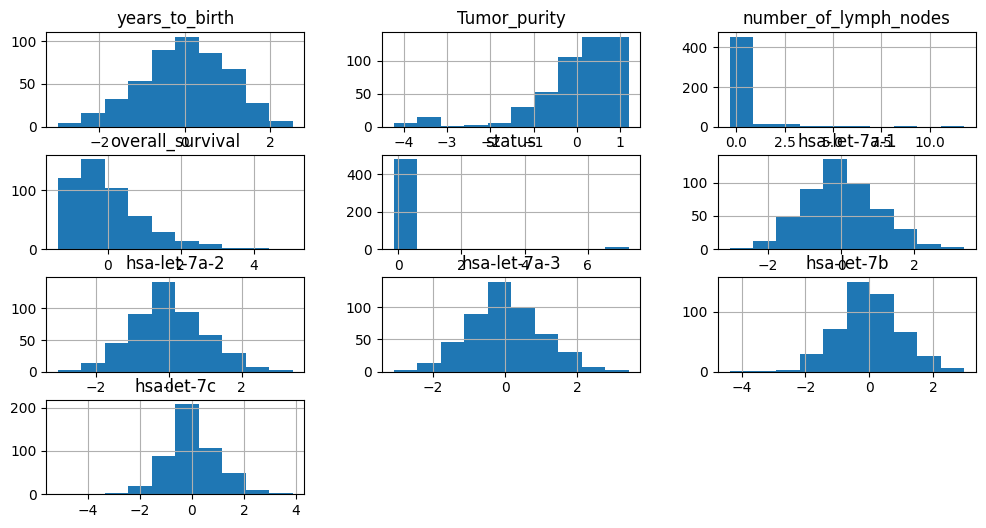

In [ ]:
gene_data.iloc[:, :10].hist(figsize=(12, 6))  # проверка распределения экспрессии по первым 10 генам (микроРНК)

In [ ]:
gene_data.loc[:, gene_data.std() == 0].shape  # Сколько признаков с 0-дисперсией

(487, 0)

In [ ]:
gene_data.mean().describe()
gene_data.std().describe()

,0
count,48272.000000
mean,1.000444
std,0.003746
min,0.866357
25%,1.000691
50%,1.001457
75%,1.001983
max,1.002060


In [ ]:
df.describe()

,years_to_birth,Tumor_purity,number_of_lymph_nodes,overall_survival,status,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,...,SMIM9,SNORA36A.1,SNORA56.1,TMLHE.1,VBP1.1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
count,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,...,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02,4.870000e+02
mean,-2.918040e-17,-4.960668e-16,-2.918040e-17,-7.295100e-17,7.295100e-18,3.457877e-15,1.196396e-15,-2.651769e-15,-3.253615e-15,2.288838e-15,...,1.094265e-17,1.094265e-17,1.094265e-17,1.094265e-17,1.094265e-17,4.741815e-17,4.741815e-17,4.741815e-17,4.741815e-17,4.741815e-17
std,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,...,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00,1.001028e+00
min,-2.973979e+00,-4.228892e+00,-3.517216e-01,-1.373099e+00,-1.380754e-01,-3.050688e+00,-3.037068e+00,-3.084796e+00,-4.379722e+00,-5.154127e+00,...,-5.182772e+00,-5.182772e+00,-5.182772e+00,-5.182772e+00,-5.182772e+00,-5.190978e+00,-5.190978e+00,-5.190978e+00,-5.190978e+00,-5.190978e+00
25%,-7.416187e-01,-3.467759e-01,-3.517216e-01,-7.142827e-01,-1.380754e-01,-6.766812e-01,-6.828012e-01,-6.732298e-01,-6.416197e-01,-5.925842e-01,...,-3.155204e-01,-3.155204e-01,-3.155204e-01,-3.155204e-01,-3.155204e-01,-3.313989e-01,-3.313989e-01,-3.313989e-01,-3.313989e-01,-3.313989e-01
50%,2.501244e-03,2.393079e-01,-3.517216e-01,-2.025868e-01,-1.380754e-01,-2.606531e-02,-2.127184e-02,-2.415946e-02,-5.791583e-02,-7.506249e-02,...,5.785774e-02,5.785774e-02,5.785774e-02,5.785774e-02,5.785774e-02,4.139070e-02,4.139070e-02,4.139070e-02,4.139070e-02,4.139070e-02
75%,7.466212e-01,6.848419e-01,0.000000e+00,4.723613e-01,-1.380754e-01,6.586913e-01,6.459922e-01,6.494642e-01,6.099677e-01,5.832173e-01,...,3.378914e-01,3.378914e-01,3.378914e-01,3.378914e-01,3.378914e-01,3.209829e-01,3.209829e-01,3.209829e-01,3.209829e-01,3.209829e-01
max,2.532509e+00,1.190087e+00,1.178572e+01,5.070526e+00,7.287312e+00,3.373288e+00,3.394309e+00,3.419468e+00,2.977133e+00,3.874314e+00,...,1.233933e+01,1.233933e+01,1.233933e+01,1.233933e+01,1.233933e+01,1.230351e+01,1.230351e+01,1.230351e+01,1.230351e+01,1.230351e+01


In [ ]:
df.head()

,years_to_birth,Tumor_purity,pathology_T_stage,pathology_N_stage,histological_type,number_of_lymph_nodes,gender,radiation_therapy,residual_tumor,race,...,SMIM9,SNORA36A.1,SNORA56.1,TMLHE.1,VBP1.1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA.CH.5753,1.341917,0.590223,t3,n1,prostateadenocarcinomaacinartype,2.075767,male,no,r0,white,...,-1.555669,-1.555669,-1.555669,-1.555669,-1.555669,-1.569593,-1.569593,-1.569593,-1.569593,-1.569593
TCGA.CH.5763,0.746621,-0.095991,t3,n0,prostateadenocarcinomaacinartype,-0.351722,male,no,r0,white,...,0.297887,0.297887,0.297887,0.297887,0.297887,0.281041,0.281041,0.281041,0.281041,0.281041
TCGA.CH.5764,0.746621,0.380776,t3,n0,prostateadenocarcinomaacinartype,-0.351722,male,no,r0,white,...,-0.168836,-0.168836,-0.168836,-0.168836,-0.168836,-0.184946,-0.184946,-0.184946,-0.184946,-0.184946
TCGA.CH.5772,0.300149,0.336682,t3,n0,prostateadenocarcinomaacinartype,-0.351722,male,yes,r1,white,...,0.324556,0.324556,0.324556,0.324556,0.324556,0.307669,0.307669,0.307669,0.307669,0.307669
TCGA.CH.5790,0.448973,0.721587,t2,n0,prostateadenocarcinomaacinartype,-0.351722,male,no,r0,white,...,-0.222176,-0.222176,-0.222176,-0.222176,-0.222176,-0.238202,-0.238202,-0.238202,-0.238202,-0.238202


## Реализация и тестирование модели Бинарной Классификации

<ipython-input-7-10f2d63af14b>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pathology_T_stage'] = df['pathology_T_stage'].astype(int)



--- Fold 1 ---
🎯 Accuracy: 0.7142857142857143

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.75      0.40      0.52        30
           3       0.70      0.91      0.80        47

    accuracy                           0.71        77
   macro avg       0.73      0.66      0.66        77
weighted avg       0.72      0.71      0.69        77

Accuracy: 0.714
Sensitivity (Recall): 0.915
Specificity: 0.400
PPV (Precision): 0.705
NPV: 0.750
F1-score: 0.796
MCC: 0.378


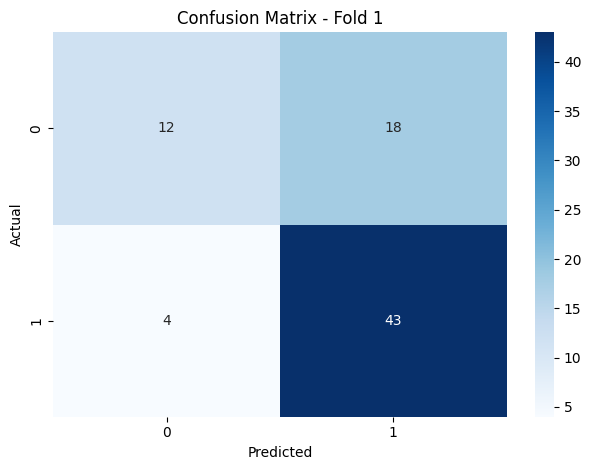


--- Fold 2 ---
🎯 Accuracy: 0.6103896103896104

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.50      0.43      0.46        30
           3       0.67      0.72      0.69        47

    accuracy                           0.61        77
   macro avg       0.58      0.58      0.58        77
weighted avg       0.60      0.61      0.60        77

Accuracy: 0.610
Sensitivity (Recall): 0.723
Specificity: 0.433
PPV (Precision): 0.667
NPV: 0.500
F1-score: 0.694
MCC: 0.162


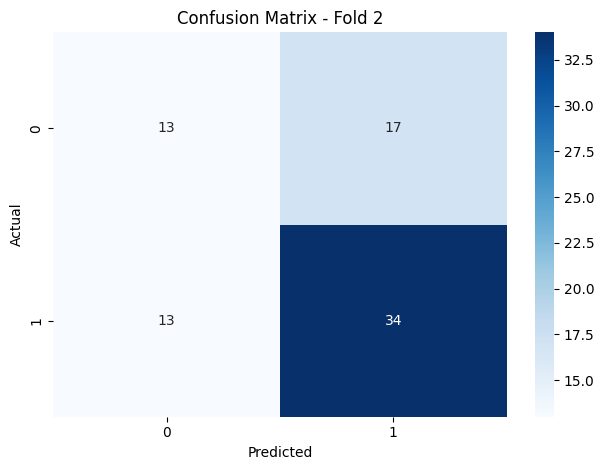


--- Fold 3 ---
🎯 Accuracy: 0.7368421052631579

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.80      0.41      0.55        29
           3       0.72      0.94      0.81        47

    accuracy                           0.74        76
   macro avg       0.76      0.67      0.68        76
weighted avg       0.75      0.74      0.71        76

Accuracy: 0.737
Sensitivity (Recall): 0.936
Specificity: 0.414
PPV (Precision): 0.721
NPV: 0.800
F1-score: 0.815
MCC: 0.427


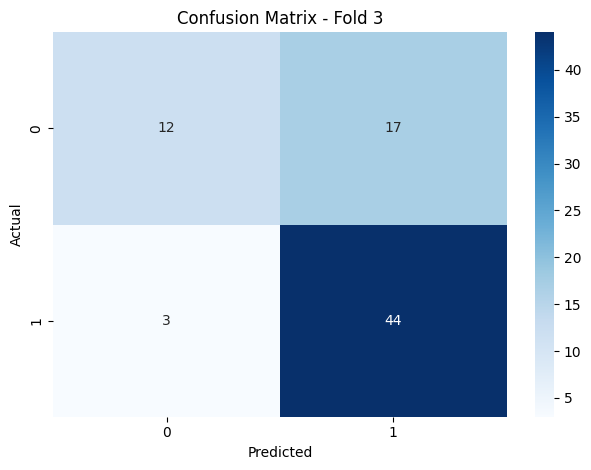


--- Fold 4 ---
🎯 Accuracy: 0.7236842105263158

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.67      0.55      0.60        29
           3       0.75      0.83      0.79        47

    accuracy                           0.72        76
   macro avg       0.71      0.69      0.70        76
weighted avg       0.72      0.72      0.72        76

Accuracy: 0.724
Sensitivity (Recall): 0.830
Specificity: 0.552
PPV (Precision): 0.750
NPV: 0.667
F1-score: 0.788
MCC: 0.399


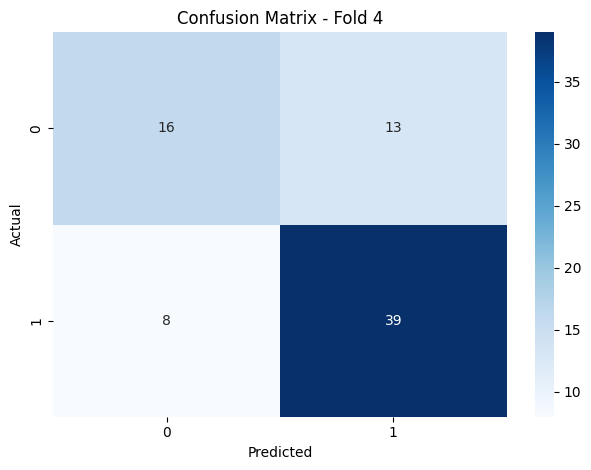


--- Fold 5 ---
🎯 Accuracy: 0.7236842105263158

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.67      0.60      0.63        30
           3       0.76      0.80      0.78        46

    accuracy                           0.72        76
   macro avg       0.71      0.70      0.71        76
weighted avg       0.72      0.72      0.72        76

Accuracy: 0.724
Sensitivity (Recall): 0.804
Specificity: 0.600
PPV (Precision): 0.755
NPV: 0.667
F1-score: 0.779
MCC: 0.413


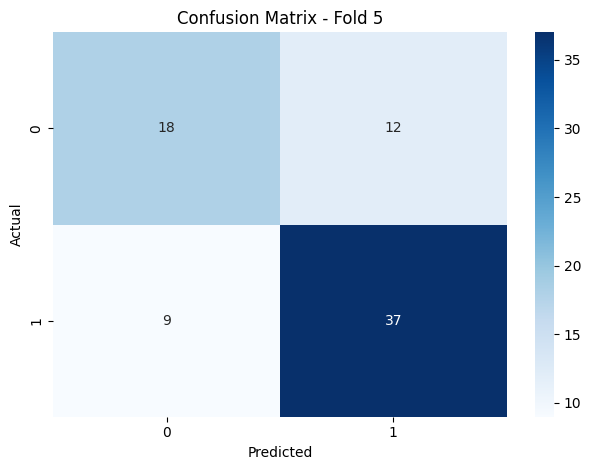


✅ Final Test Accuracy: 0.7291666666666666

📊 Final Classification Report:
               precision    recall  f1-score   support

           2       0.74      0.46      0.57        37
           3       0.73      0.90      0.80        59

    accuracy                           0.73        96
   macro avg       0.73      0.68      0.68        96
weighted avg       0.73      0.73      0.71        96


📈 Biostatistics Metrics on Final Test:
Accuracy: 0.729
Sensitivity (Recall): 0.898
Specificity: 0.459
PPV (Precision): 0.726
NPV: 0.739
F1-score: 0.803
MCC: 0.408

🔵 ROC-AUC: 0.724


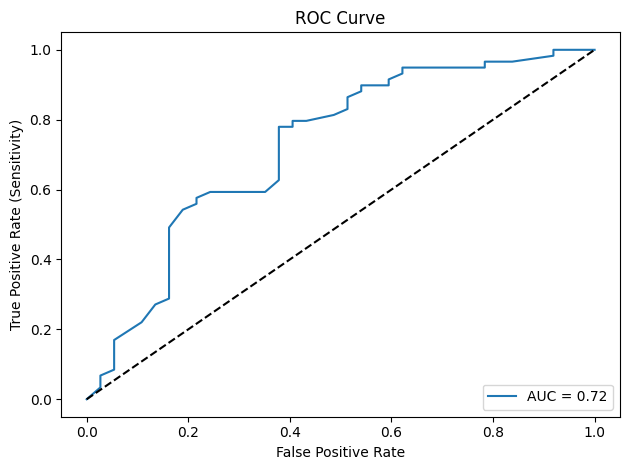

<ipython-input-7-10f2d63af14b>:126: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


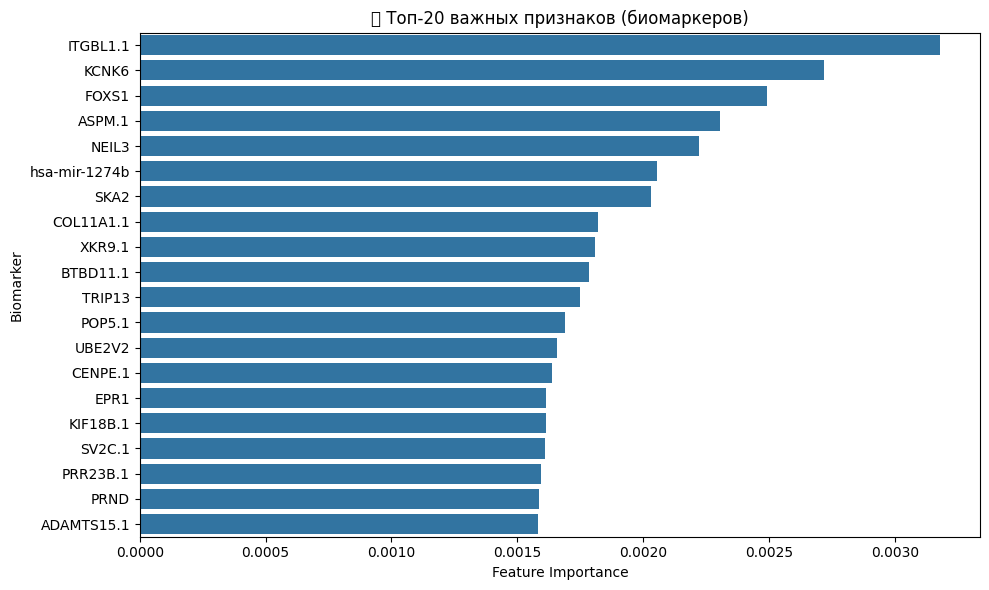


💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_binary_classification.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    matthews_corrcoef, roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt

# Вспомогательная функция для расширенных метрик
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) != 0 else 0  # Precision
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) != 0 else 0
    mcc = matthews_corrcoef(y_true, y_pred)

    return {
        'Accuracy': accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'PPV (Precision)': ppv,
        'NPV': npv,
        'F1-score': f1,
        'MCC': mcc
    }

# 1. Загрузка очищенного и нормализованного датасета
df = pd.read_csv('/content/cleaned_normalized_data.csv', index_col=0)

# 2. Целевая переменная в числовой формат
df['pathology_T_stage'] = df['pathology_T_stage'].replace({'t2': 2, 't3': 3})
df = df[df['pathology_T_stage'].isin([2, 3])]
df['pathology_T_stage'] = df['pathology_T_stage'].astype(int)

# 3. One-hot кодирование
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)

# 4. Разделение признаков и целевой переменной
y = df['pathology_T_stage']
X = df.drop(columns=['pathology_T_stage'])

# 5. Деление на train/test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Кросс-валидация
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Метрики
    print("🎯 Accuracy:", accuracy_score(y_val, y_pred))
    print("\n📋 Classification Report:\n", classification_report(y_val, y_pred, zero_division=0))

    metrics = calculate_metrics(y_val, y_pred)
    for k, v in metrics.items():
        print(f"{k}: {v:.3f}")

    # Матрица ошибок
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.tight_layout()
    plt.show()

# 7. Финальное тестирование
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_full, y_train_full)
final_preds = final_model.predict(X_test)

print("\n✅ Final Test Accuracy:", accuracy_score(y_test, final_preds))
print("\n📊 Final Classification Report:\n", classification_report(y_test, final_preds, zero_division=0))

final_metrics = calculate_metrics(y_test, final_preds)
print("\n📈 Biostatistics Metrics on Final Test:")
for k, v in final_metrics.items():
    print(f"{k}: {v:.3f}")

# ROC-AUC если нужно
if hasattr(final_model, "predict_proba"):
    probs = final_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs, pos_label=3)
    print(f"\n🔵 ROC-AUC: {auc:.3f}")

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# 8. Топ-20 признаков по важности
importances = final_model.feature_importances_
top_indices = importances.argsort()[-20:][::-1]
top_features = [X.columns[i] for i in top_indices]
top_scores = importances[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("🔬 Топ-20 важных признаков (биомаркеров)")
plt.xlabel("Feature Importance")
plt.ylabel("Biomarker")
plt.tight_layout()
plt.show()

# 9. Сохранение топ-20 биомаркеров в CSV
top_biomarkers_df = pd.DataFrame({
    "Biomarker": top_features,
    "Importance": top_scores
})

top_biomarkers_df.to_csv("top_20_biomarkers_binary_classification.csv", index=False)
print("\n💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_binary_classification.csv'")


## Реализация и тестирование модели Многоклассовой Классификации

In [ ]:
# Уникальные значения классов
print("Классы в целевой переменной:")
print(df['pathology_T_stage'].unique())

Классы в целевой переменной:
[3 2]


In [ ]:
print("Распределение классов:")
print(df['pathology_T_stage'].value_counts().sort_index())

Распределение классов:
pathology_T_stage
2    185
3    293
Name: count, dtype: int64


In [ ]:
# Показывает весь датафрейм
from IPython.display import display
display(df)

,years_to_birth,Tumor_purity,pathology_T_stage,number_of_lymph_nodes,overall_survival,status,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,...,"overallsurvival_972,0","overallsurvival_973,0","overallsurvival_974,0","overallsurvival_975,0","overallsurvival_979,0","overallsurvival_983,0","overallsurvival_987,0","overallsurvival_992,0","overallsurvival_994,0","overallsurvival_NA,NA"
TCGA.CH.5753,1.341917,0.590223,3,2.075767,-1.373099,-0.138075,-0.058162,-0.071245,-0.059089,-1.634851,...,False,False,False,False,False,False,False,False,False,False
TCGA.CH.5763,0.746621,-0.095991,3,-0.351722,-0.942062,-0.138075,-0.482365,-0.474512,-0.473516,-0.107454,...,False,False,False,False,False,False,False,False,False,False
TCGA.CH.5764,0.746621,0.380776,3,-0.351722,-1.373099,-0.138075,-0.039967,-0.032536,-0.032789,0.063726,...,False,False,False,False,False,False,False,False,False,False
TCGA.CH.5772,0.300149,0.336682,3,-0.351722,-0.785907,-0.138075,0.067157,0.065567,0.063369,-0.816325,...,False,False,False,False,False,False,False,False,False,False
TCGA.CH.5790,0.448973,0.721587,2,-0.351722,-0.156128,-0.138075,1.477149,1.483861,1.490543,0.399210,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.ZG.A9M4,0.597797,-0.118956,3,0.457441,-0.707185,-0.138075,1.137377,1.132206,1.128716,1.696193,...,False,False,False,False,False,False,False,False,False,False
TCGA.ZG.A9MC,1.193093,-2.030619,3,1.266604,-0.825914,-0.138075,-0.791063,-0.787253,-0.780689,-1.115494,...,False,False,False,False,False,False,False,False,False,False
TCGA.ZG.A9N3,1.788389,0.013326,3,0.457441,-0.962710,-0.138075,-1.854332,-1.826858,-1.840282,-1.011128,...,False,False,False,False,False,False,False,False,False,False
TCGA.ZG.A9ND,-0.890443,-0.333915,3,-0.351722,-0.883988,-0.138075,0.722577,0.706820,0.696619,0.525788,...,False,False,False,False,False,False,False,False,False,False



--- Fold 1 ---
🎯 Accuracy: 0.718

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.68      0.57      0.62        30
           3       0.74      0.83      0.78        47
           4       0.00      0.00      0.00         1

    accuracy                           0.72        78
   macro avg       0.47      0.47      0.47        78
weighted avg       0.70      0.72      0.71        78



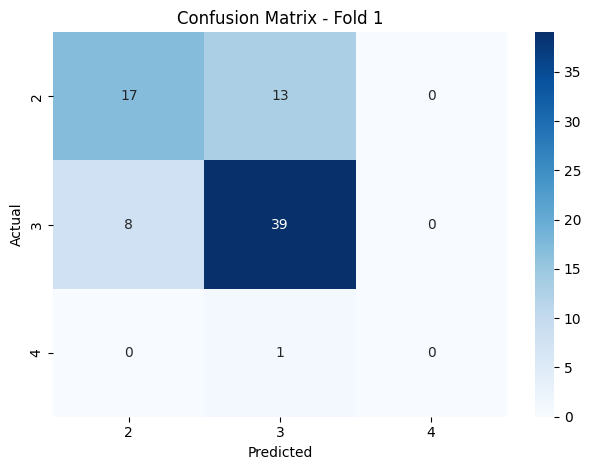

📊 Biostatistics per class:

Class 2:
  Sensitivity: 0.567
  Specificity: 0.833
  Precision:   0.680
  NPV:         0.755

Class 3:
  Sensitivity: 0.830
  Specificity: 0.548
  Precision:   0.736
  NPV:         0.680

Class 4:
  Sensitivity: 0.000
  Specificity: 1.000
  Precision:   0.000
  NPV:         0.987

📈 MCC: 0.401

--- Fold 2 ---
🎯 Accuracy: 0.692

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.68      0.43      0.53        30
           3       0.69      0.87      0.77        47
           4       0.00      0.00      0.00         1

    accuracy                           0.69        78
   macro avg       0.46      0.44      0.43        78
weighted avg       0.68      0.69      0.67        78



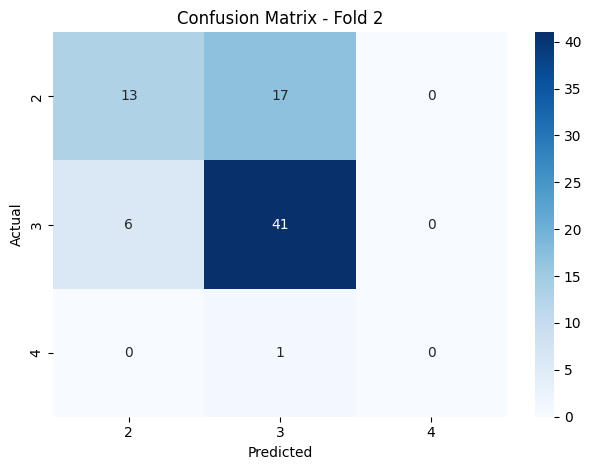

📊 Biostatistics per class:

Class 2:
  Sensitivity: 0.433
  Specificity: 0.875
  Precision:   0.684
  NPV:         0.712

Class 3:
  Sensitivity: 0.872
  Specificity: 0.419
  Precision:   0.695
  NPV:         0.684

Class 4:
  Sensitivity: 0.000
  Specificity: 1.000
  Precision:   0.000
  NPV:         0.987

📈 MCC: 0.337

--- Fold 3 ---
🎯 Accuracy: 0.667

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.60      0.52      0.56        29
           3       0.70      0.79      0.74        47
           4       0.00      0.00      0.00         2

    accuracy                           0.67        78
   macro avg       0.43      0.43      0.43        78
weighted avg       0.64      0.67      0.65        78



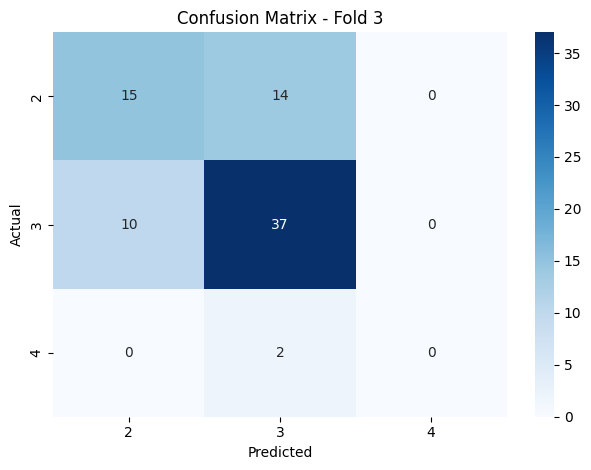

📊 Biostatistics per class:

Class 2:
  Sensitivity: 0.517
  Specificity: 0.796
  Precision:   0.600
  NPV:         0.736

Class 3:
  Sensitivity: 0.787
  Specificity: 0.484
  Precision:   0.698
  NPV:         0.600

Class 4:
  Sensitivity: 0.000
  Specificity: 1.000
  Precision:   0.000
  NPV:         0.974

📈 MCC: 0.296

--- Fold 4 ---
🎯 Accuracy: 0.590

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.45      0.34      0.39        29
           3       0.64      0.77      0.70        47
           4       0.00      0.00      0.00         2

    accuracy                           0.59        78
   macro avg       0.37      0.37      0.36        78
weighted avg       0.56      0.59      0.57        78



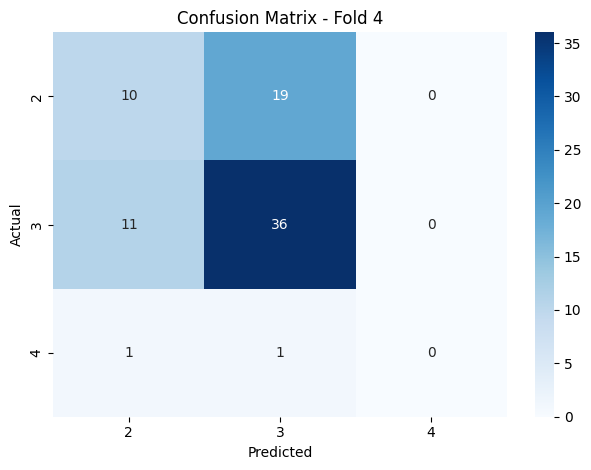

📊 Biostatistics per class:

Class 2:
  Sensitivity: 0.345
  Specificity: 0.755
  Precision:   0.455
  NPV:         0.661

Class 3:
  Sensitivity: 0.766
  Specificity: 0.355
  Precision:   0.643
  NPV:         0.500

Class 4:
  Sensitivity: 0.000
  Specificity: 1.000
  Precision:   0.000
  NPV:         0.974

📈 MCC: 0.116

--- Fold 5 ---
🎯 Accuracy: 0.623

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.56      0.30      0.39        30
           3       0.64      0.85      0.73        46
           4       0.00      0.00      0.00         1

    accuracy                           0.62        77
   macro avg       0.40      0.38      0.37        77
weighted avg       0.60      0.62      0.59        77



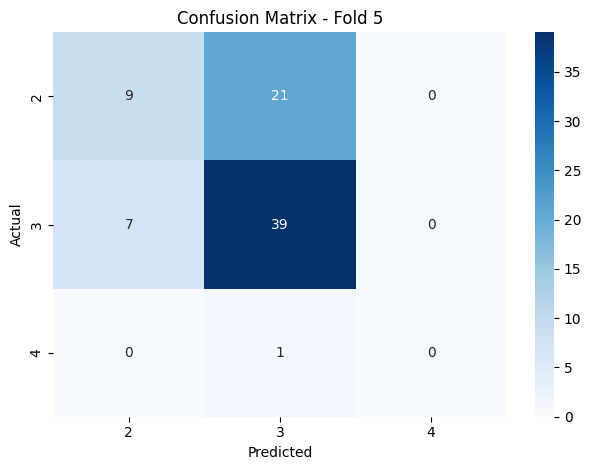

📊 Biostatistics per class:

Class 2:
  Sensitivity: 0.300
  Specificity: 0.851
  Precision:   0.562
  NPV:         0.656

Class 3:
  Sensitivity: 0.848
  Specificity: 0.290
  Precision:   0.639
  NPV:         0.562

Class 4:
  Sensitivity: 0.000
  Specificity: 1.000
  Precision:   0.000
  NPV:         0.987

📈 MCC: 0.172

✅ Final Test Accuracy: 0.7040816326530612

📋 Final Classification Report:
               precision    recall  f1-score   support

           2       0.78      0.38      0.51        37
           3       0.69      0.93      0.79        59
           4       0.00      0.00      0.00         2

    accuracy                           0.70        98
   macro avg       0.49      0.44      0.43        98
weighted avg       0.71      0.70      0.67        98

📊 Biostatistics per class:

Class 2:
  Sensitivity: 0.378
  Specificity: 0.934
  Precision:   0.778
  NPV:         0.713

Class 3:
  Sensitivity: 0.932
  Specificity: 0.359
  Precision:   0.688
  NPV:         0.778

Clas

<ipython-input-5-64a59eab5a9c>:71: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


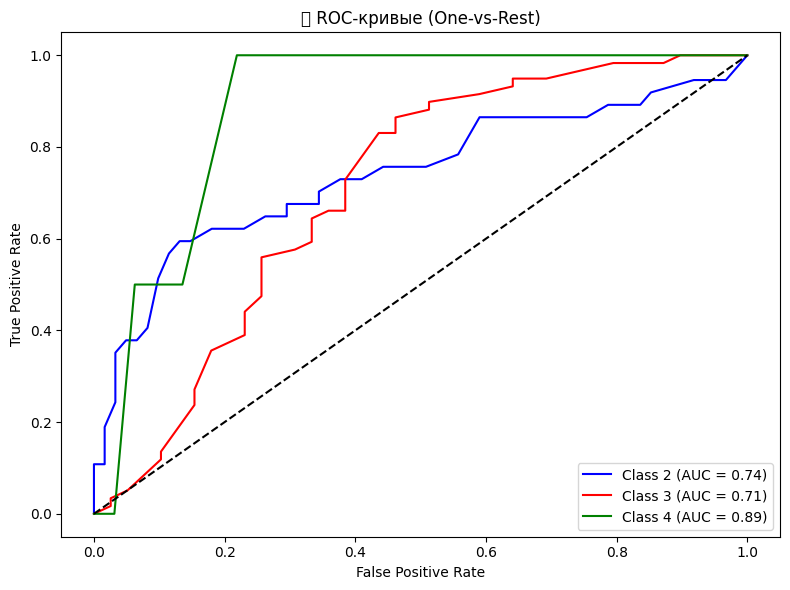

<ipython-input-5-64a59eab5a9c>:142: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


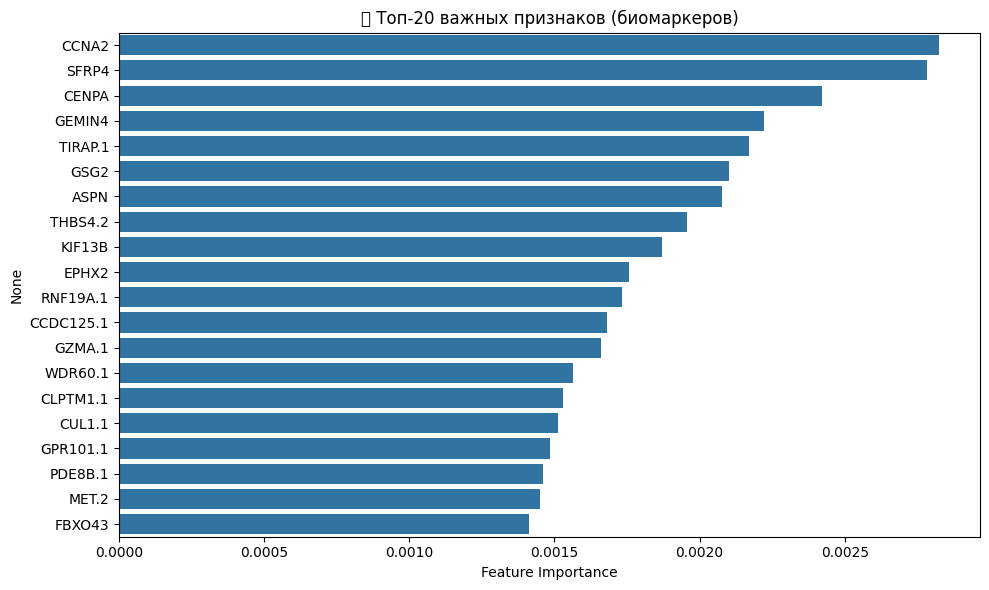

<ipython-input-5-64a59eab5a9c>:157: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


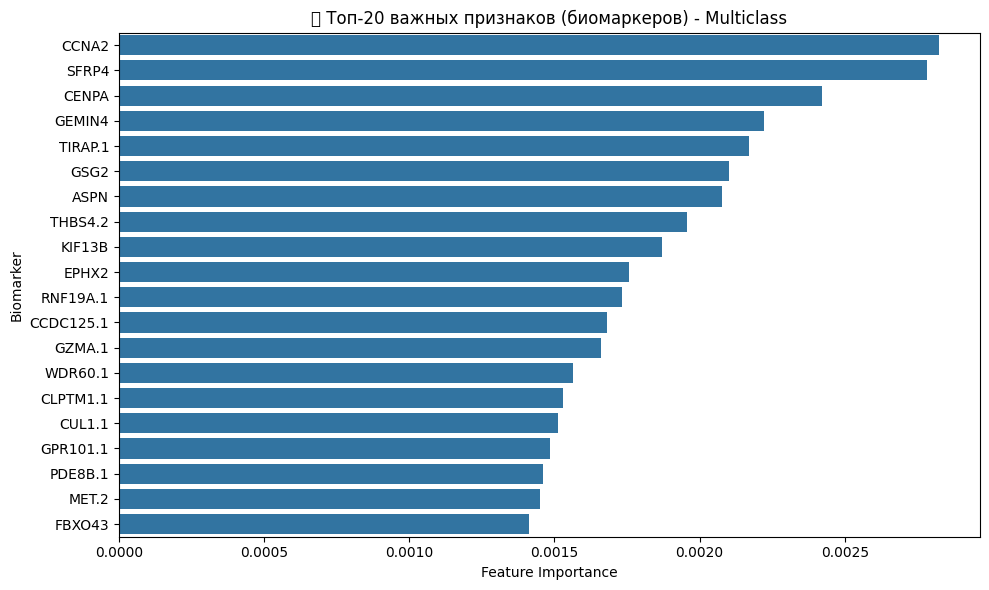


💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_multiclass_classification.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_curve, auc,
                             matthews_corrcoef)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

# Загрузка данных
df = pd.read_csv('/content/cleaned_normalized_data.csv', index_col=0)

# Целевая переменная
df['pathology_T_stage'] = df['pathology_T_stage'].str.lower().str.strip()
df = df[df['pathology_T_stage'].isin(['t1', 't2', 't3', 't4'])]

# Кодирование классов
label_mapping = {'t1': 1, 't2': 2, 't3': 3, 't4': 4}
df['pathology_T_stage'] = df['pathology_T_stage'].map(label_mapping)

# One-hot кодирование
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

# Признаки и целевая
y = df['pathology_T_stage']
X = df.drop(columns=['pathology_T_stage'])

# Деление на train/test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Кросс-валидация
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
class_labels = sorted(y.unique())

def biostat_metrics(cm, class_idx):
    TP = cm[class_idx, class_idx]
    FN = cm[class_idx, :].sum() - TP
    FP = cm[:, class_idx].sum() - TP
    TN = cm.sum() - TP - FN - FP
    sensitivity = TP / (TP + FN) if (TP + FN) else 0
    specificity = TN / (TN + FP) if (TN + FP) else 0
    precision = TP / (TP + FP) if (TP + FP) else 0
    npv = TN / (TN + FN) if (TN + FN) else 0
    return sensitivity, specificity, precision, npv

def plot_multiclass_roc(y_true, y_score, class_labels):
    y_bin = label_binarize(y_true, classes=class_labels)
    fpr, tpr, roc_auc = {}, {}, {}

    for idx, class_id in enumerate(class_labels):
        if idx >= y_score.shape[1]:
            print(f"⚠️ ROC: Пропущен класс {class_id}")
            continue
        fpr[class_id], tpr[class_id], _ = roc_curve(y_bin[:, idx], y_score[:, idx])
        roc_auc[class_id] = auc(fpr[class_id], tpr[class_id])

    plt.figure(figsize=(8, 6))
    colors = cycle(['blue', 'red', 'green', 'orange'])
    for class_id, color in zip(roc_auc.keys(), colors):
        plt.plot(fpr[class_id], tpr[class_id], color=color,
                 label=f'Class {class_id} (AUC = {roc_auc[class_id]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("🔬 ROC-кривые (One-vs-Rest)")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# Кросс-валидация
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    print(f"\n--- Fold {fold} ---")
    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print(f"🎯 Accuracy: {accuracy_score(y_val, y_pred):.3f}")
    print("\n📋 Classification Report:\n", classification_report(y_val, y_pred, zero_division=0))

    # Матрица ошибок
    cm = confusion_matrix(y_val, y_pred, labels=class_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    print("📊 Biostatistics per class:")
    for idx, cls in enumerate(class_labels):
        sens, spec, prec, npv = biostat_metrics(cm, idx)
        print(f"\nClass {cls}:")
        print(f"  Sensitivity: {sens:.3f}")
        print(f"  Specificity: {spec:.3f}")
        print(f"  Precision:   {prec:.3f}")
        print(f"  NPV:         {npv:.3f}")

    print(f"\n📈 MCC: {matthews_corrcoef(y_val, y_pred):.3f}")

# Финальная модель
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_full, y_train_full)
final_preds = final_model.predict(X_test)
final_probs = final_model.predict_proba(X_test)

print("\n✅ Final Test Accuracy:", accuracy_score(y_test, final_preds))
print("\n📋 Final Classification Report:\n", classification_report(y_test, final_preds, zero_division=0))

final_cm = confusion_matrix(y_test, final_preds, labels=class_labels)
print("📊 Biostatistics per class:")
for idx, cls in enumerate(class_labels):
    sens, spec, prec, npv = biostat_metrics(final_cm, idx)
    print(f"\nClass {cls}:")
    print(f"  Sensitivity: {sens:.3f}")
    print(f"  Specificity: {spec:.3f}")
    print(f"  Precision:   {prec:.3f}")
    print(f"  NPV:         {npv:.3f}")

print(f"\n📈 MCC: {matthews_corrcoef(y_test, final_preds):.3f}")

# ROC
plot_multiclass_roc(y_test, final_probs, class_labels=class_labels)

# Топ-20 признаков
importances = final_model.feature_importances_
top_idx = importances.argsort()[-20:][::-1]
top_feats = X.columns[top_idx]
top_scores = importances[top_idx]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_feats)
plt.title("🔬 Топ-20 важных признаков (биомаркеров)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

# 9. Сохранение топ-20 биомаркеров в CSV (многоклассовая модель)
importances = final_model.feature_importances_
top_indices = importances.argsort()[-20:][::-1]
top_features = [X.columns[i] for i in top_indices]
top_scores = importances[top_indices]

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("🔬 Топ-20 важных признаков (биомаркеров) - Multiclass")
plt.xlabel("Feature Importance")
plt.ylabel("Biomarker")
plt.tight_layout()
plt.show()

# Сохранение в CSV
top_biomarkers_df = pd.DataFrame({
    "Biomarker": top_features,
    "Importance": top_scores
})
top_biomarkers_df.to_csv("top_20_biomarkers_multiclass_classification.csv", index=False)
print("\n💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_multiclass_classification.csv'")

In [ ]:
print("Распределение классов:")
print(df['pathology_T_stage'].value_counts().sort_index())

Распределение классов:
pathology_T_stage
t2    185
t3    293
t4      9
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Отделим каждый класс
df_majority = df[df['pathology_T_stage'].isin([2, 3])]
df_minority = df[df['pathology_T_stage'] == 4]

# Апсемплируем класс 4 до, например, 100 строк
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=100,
                                 random_state=42)

# Объединяем обратно
df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
print("Распределение классов:")
print(df['pathology_T_stage'].value_counts().sort_index())

Распределение классов:
pathology_T_stage
2    185
3    293
4    100
Name: count, dtype: int64



--- Fold 1 ---
🎯 Accuracy: 0.7849462365591398
📈 Balanced Accuracy: 0.817966903073286
📉 MCC: 0.647993943981832

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.67      0.67      0.67        30
           3       0.79      0.79      0.79        47
           4       1.00      1.00      1.00        16

    accuracy                           0.78        93
   macro avg       0.82      0.82      0.82        93
weighted avg       0.78      0.78      0.78        93



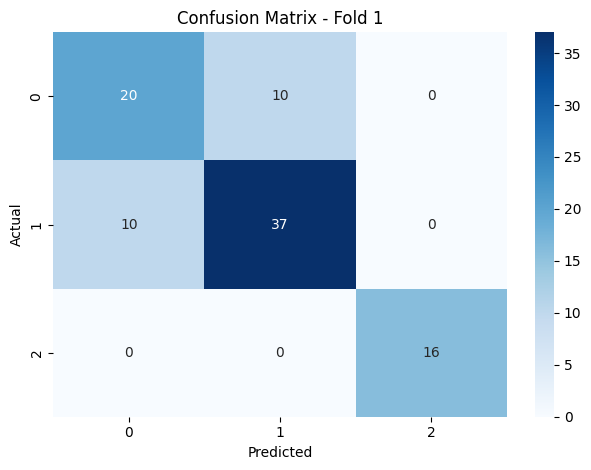


--- Fold 2 ---
🎯 Accuracy: 0.7204301075268817
📈 Balanced Accuracy: 0.7392434988179669
📉 MCC: 0.5406484248725355

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.61      0.37      0.46        30
           3       0.68      0.85      0.75        47
           4       1.00      1.00      1.00        16

    accuracy                           0.72        93
   macro avg       0.76      0.74      0.74        93
weighted avg       0.71      0.72      0.70        93



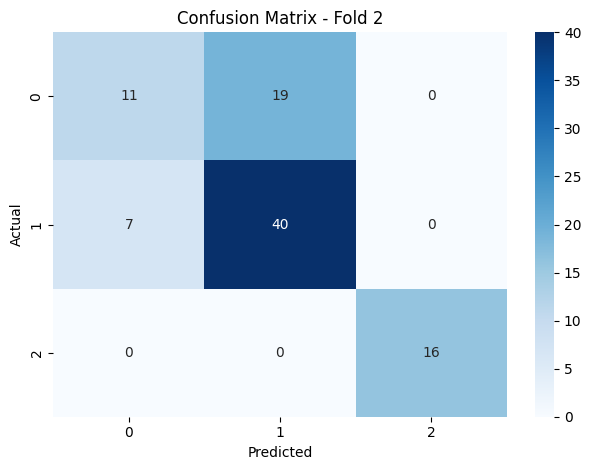


--- Fold 3 ---
🎯 Accuracy: 0.7391304347826086
📈 Balanced Accuracy: 0.7549523110785034
📉 MCC: 0.5687934894343105

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.63      0.41      0.50        29
           3       0.70      0.85      0.77        47
           4       1.00      1.00      1.00        16

    accuracy                           0.74        92
   macro avg       0.78      0.75      0.76        92
weighted avg       0.73      0.74      0.72        92



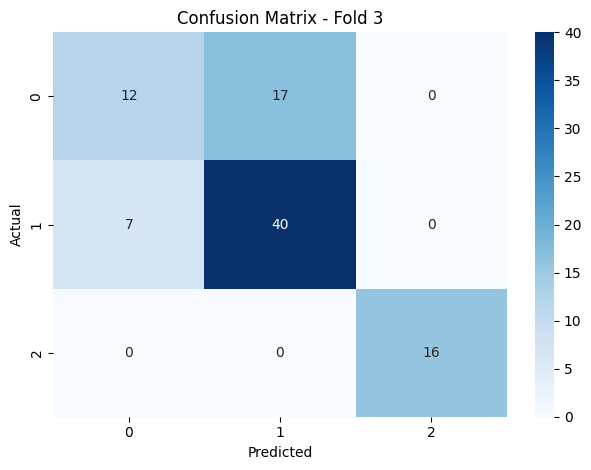


--- Fold 4 ---
🎯 Accuracy: 0.6956521739130435
📈 Balanced Accuracy: 0.7089752995842504
📉 MCC: 0.5031994435554613

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.62      0.28      0.38        29
           3       0.66      0.85      0.74        47
           4       0.89      1.00      0.94        16

    accuracy                           0.70        92
   macro avg       0.72      0.71      0.69        92
weighted avg       0.68      0.70      0.66        92



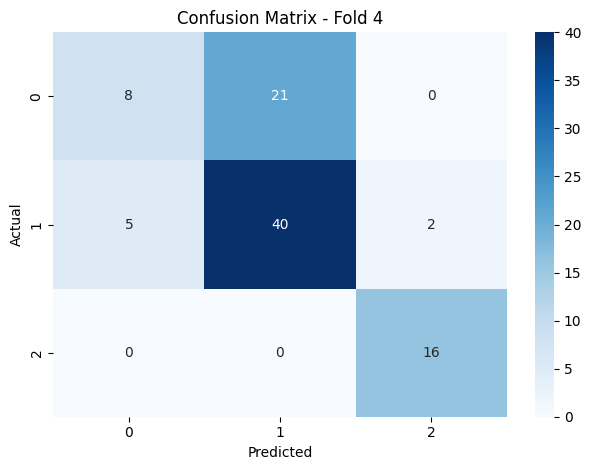


--- Fold 5 ---
🎯 Accuracy: 0.6630434782608695
📈 Balanced Accuracy: 0.6980676328502415
📉 MCC: 0.4425722903409003

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.48      0.33      0.39        30
           3       0.64      0.76      0.69        46
           4       1.00      1.00      1.00        16

    accuracy                           0.66        92
   macro avg       0.70      0.70      0.70        92
weighted avg       0.65      0.66      0.65        92



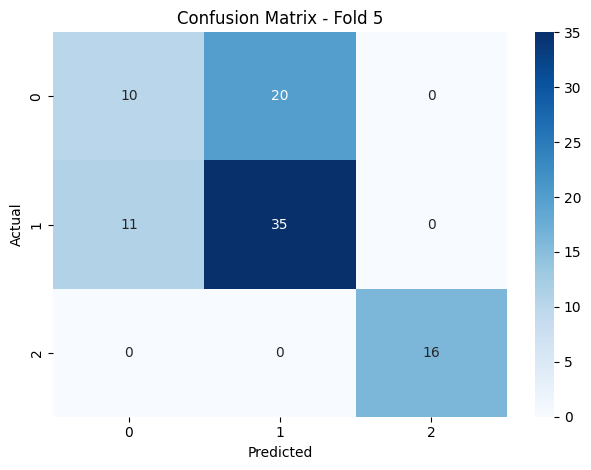


✅ Final Test Accuracy: 0.7758620689655172
📈 Final Balanced Accuracy: 0.7792029317453046
📉 Final MCC: 0.6433781041838766

📋 Final Classification Report:
               precision    recall  f1-score   support

           2       0.79      0.41      0.54        37
           3       0.71      0.93      0.81        59
           4       1.00      1.00      1.00        20

    accuracy                           0.78       116
   macro avg       0.83      0.78      0.78       116
weighted avg       0.79      0.78      0.75       116



<ipython-input-17-3dd8cf1c6a6b>:82: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


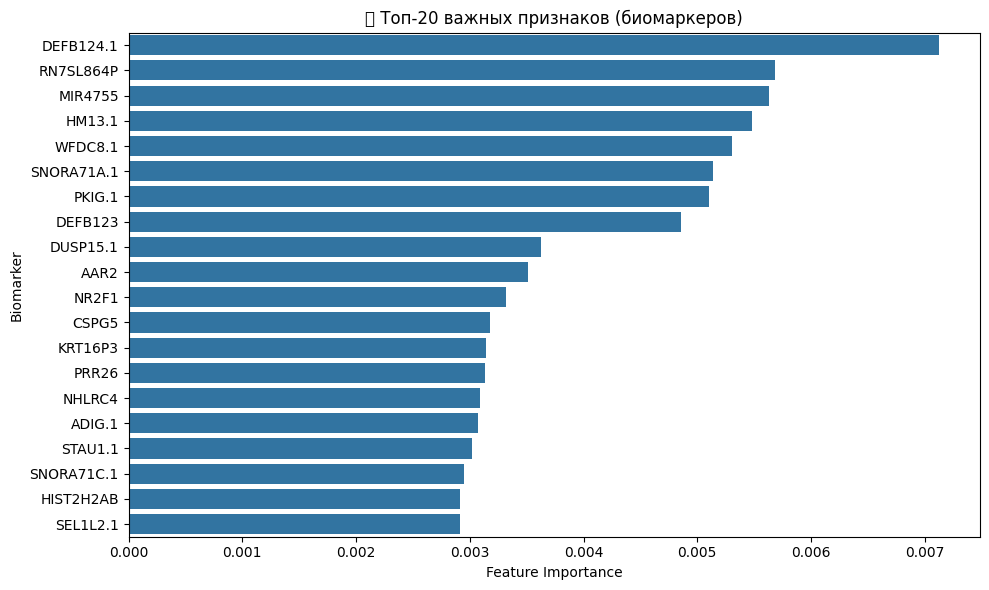

<ipython-input-17-3dd8cf1c6a6b>:109: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


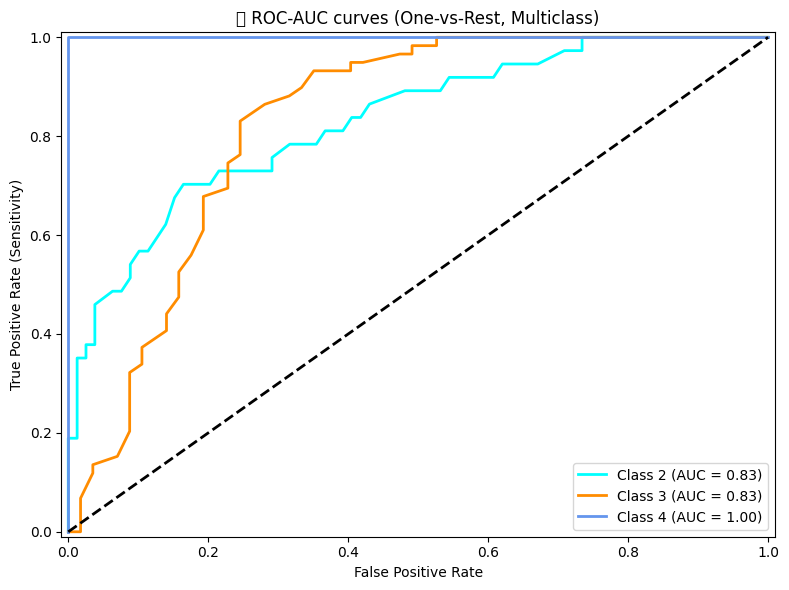


📊 Биостатистические метрики по классам:
 Class  Sensitivity (Recall)  Specificity  Precision (PPV)   NPV  F1-score   MCC
     2                 0.405        0.949            0.789 0.773     0.536 0.447
     3                 0.932        0.614            0.714 0.897     0.809 0.578
     4                 1.000        1.000            1.000 1.000     1.000 1.000

💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_multiclass_classification.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    balanced_accuracy_score, matthews_corrcoef
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# 1. Используем сбалансированный датафрейм
df = df_balanced.copy()

# 2. One-hot кодирование категориальных признаков (если ещё не сделано)
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)

# 3. Отделим признаки и целевую переменную
y = df['pathology_T_stage']
X = df.drop(columns=['pathology_T_stage'])

# 4. Делим на обучение и тест
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Кросс-валидация
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    model = RandomForestClassifier(
        n_estimators=100, class_weight='balanced', random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    print("🎯 Accuracy:", accuracy_score(y_val, y_pred))
    print("📈 Balanced Accuracy:", balanced_accuracy_score(y_val, y_pred))
    print("📉 MCC:", matthews_corrcoef(y_val, y_pred))
    print("\n📋 Classification Report:\n", classification_report(y_val, y_pred, zero_division=0))

    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.tight_layout()
    plt.show()

# 6. Финальная модель на всём трейне
final_model = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42
)
final_model.fit(X_train_full, y_train_full)
final_preds = final_model.predict(X_test)

print("\n✅ Final Test Accuracy:", accuracy_score(y_test, final_preds))
print("📈 Final Balanced Accuracy:", balanced_accuracy_score(y_test, final_preds))
print("📉 Final MCC:", matthews_corrcoef(y_test, final_preds))
print("\n📋 Final Classification Report:\n", classification_report(y_test, final_preds, zero_division=0))

# 7. Важные признаки
importances = final_model.feature_importances_
top_indices = importances.argsort()[-20:][::-1]
top_features = [X.columns[i] for i in top_indices]
top_scores = importances[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("🔬 Топ-20 важных признаков (биомаркеров)")
plt.xlabel("Feature Importance")
plt.ylabel("Biomarker")
plt.tight_layout()
plt.show()

# Бинаризуем y для one-vs-rest ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = final_model.predict_proba(X_test)

# Настройка цветов и отображения
n_classes = y_test_bin.shape[1]
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("🏁 ROC-AUC curves (One-vs-Rest, Multiclass)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 8. Биостатистические метрики по каждому классу
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_multiclass_biostats(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    results = []

    for idx, cls in enumerate(labels):
        tp = cm[idx, idx]
        fn = cm[idx, :].sum() - tp
        fp = cm[:, idx].sum() - tp
        tn = cm.sum() - (tp + fn + fp)

        sensitivity = tp / (tp + fn) if (tp + fn) else 0  # Recall
        specificity = tn / (tn + fp) if (tn + fp) else 0
        precision = tp / (tp + fp) if (tp + fp) else 0
        npv = tn / (tn + fn) if (tn + fn) else 0
        f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) else 0
        mcc = matthews_corrcoef((y_true == cls).astype(int), (y_pred == cls).astype(int))

        results.append({
            "Class": cls,
            "Sensitivity (Recall)": round(sensitivity, 3),
            "Specificity": round(specificity, 3),
            "Precision (PPV)": round(precision, 3),
            "NPV": round(npv, 3),
            "F1-score": round(f1, 3),
            "MCC": round(mcc, 3)
        })

    return pd.DataFrame(results)

labels = np.unique(y_test)
biostats_df = calculate_multiclass_biostats(y_test, final_preds, labels)

print("\n📊 Биостатистические метрики по классам:")
print(biostats_df.to_string(index=False))


# 9. Сохранение топ-20 биомаркеров в CSV (многоклассовая модель)
importances = final_model.feature_importances_
top_indices = importances.argsort()[-20:][::-1]
top_features = [X.columns[i] for i in top_indices]
top_scores = importances[top_indices]

# Сохранение в CSV
top_biomarkers_df = pd.DataFrame({
    "Biomarker": top_features,
    "Importance": top_scores
})
top_biomarkers_df.to_csv("top_20_biomarkers_multiclass_classification.csv", index=False)
print("\n💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_multiclass_classification.csv'")

## Ассемплируем только на train (обучающей выборке)


--- Fold 1 ---
🎯 Accuracy: 0.7741935483870968
📈 Balanced Accuracy: 0.8189125295508274
📉 MCC: 0.6397543767725509

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.65      0.73      0.69        30
           3       0.81      0.72      0.76        47
           4       0.94      1.00      0.97        16

    accuracy                           0.77        93
   macro avg       0.80      0.82      0.81        93
weighted avg       0.78      0.77      0.77        93



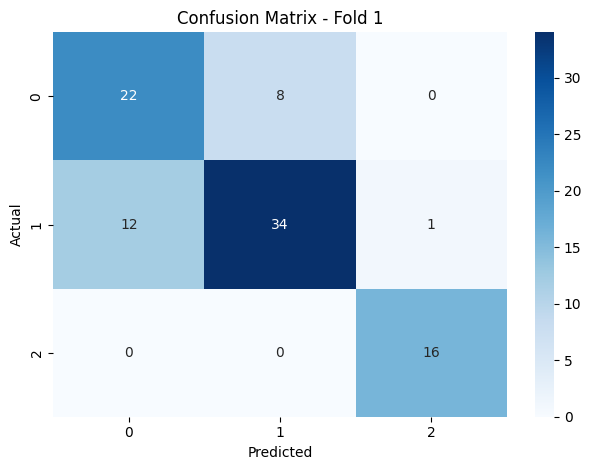


--- Fold 2 ---
🎯 Accuracy: 0.7419354838709677
📈 Balanced Accuracy: 0.76548463356974
📉 MCC: 0.5761747650210634

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.67      0.47      0.55        30
           3       0.71      0.83      0.76        47
           4       0.94      1.00      0.97        16

    accuracy                           0.74        93
   macro avg       0.77      0.77      0.76        93
weighted avg       0.74      0.74      0.73        93



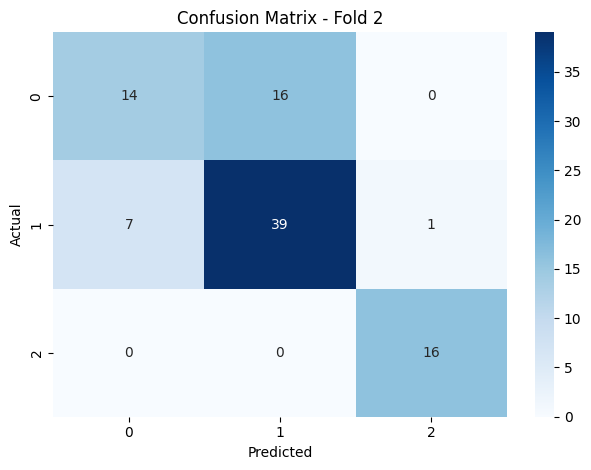


--- Fold 3 ---
🎯 Accuracy: 0.75
📈 Balanced Accuracy: 0.7796527268280754
📉 MCC: 0.5865021493683952

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.62      0.55      0.58        29
           3       0.74      0.79      0.76        47
           4       1.00      1.00      1.00        16

    accuracy                           0.75        92
   macro avg       0.79      0.78      0.78        92
weighted avg       0.75      0.75      0.75        92



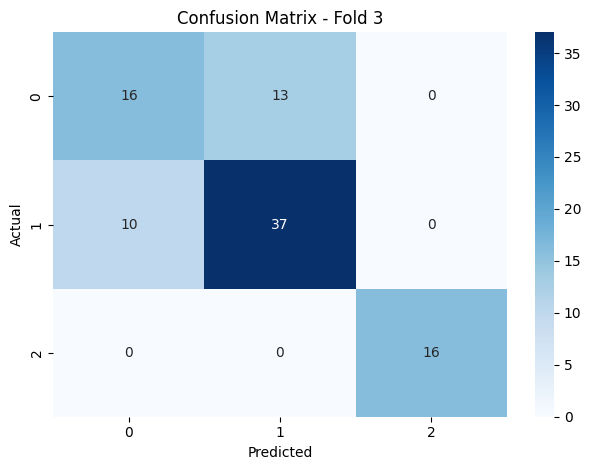


--- Fold 4 ---
🎯 Accuracy: 0.7608695652173914
📈 Balanced Accuracy: 0.7779408168256298
📉 MCC: 0.6066914275607901

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.70      0.48      0.57        29
           3       0.73      0.85      0.78        47
           4       0.94      1.00      0.97        16

    accuracy                           0.76        92
   macro avg       0.79      0.78      0.78        92
weighted avg       0.76      0.76      0.75        92



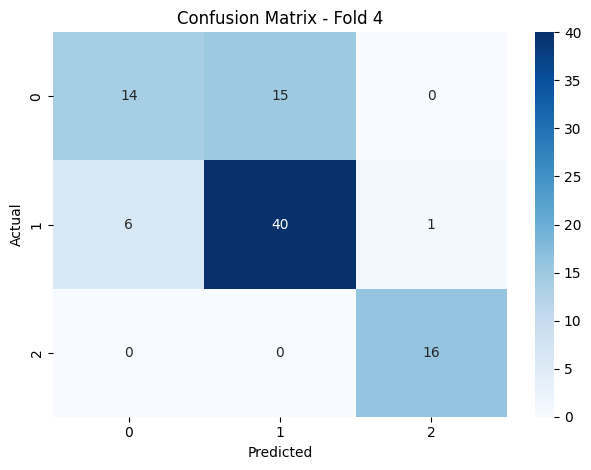


--- Fold 5 ---
🎯 Accuracy: 0.6739130434782609
📈 Balanced Accuracy: 0.7130434782608696
📉 MCC: 0.4618172458787558

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.50      0.40      0.44        30
           3       0.65      0.74      0.69        46
           4       1.00      1.00      1.00        16

    accuracy                           0.67        92
   macro avg       0.72      0.71      0.71        92
weighted avg       0.66      0.67      0.67        92



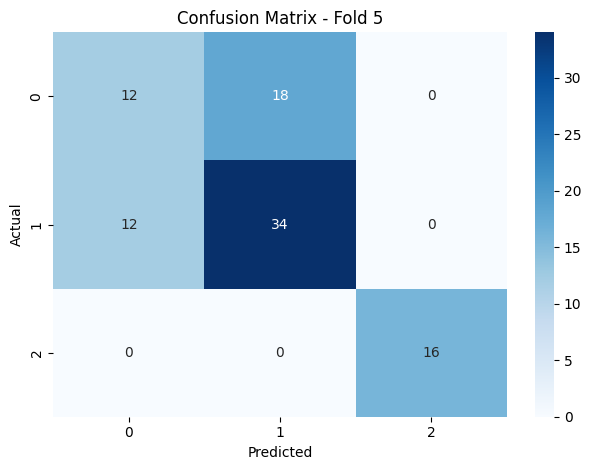


✅ Final Test Accuracy: 0.7931034482758621
📈 Final Balanced Accuracy: 0.803939532753092
📉 Final MCC: 0.6623588787426764

📋 Final Classification Report:
               precision    recall  f1-score   support

           2       0.76      0.51      0.61        37
           3       0.75      0.90      0.82        59
           4       1.00      1.00      1.00        20

    accuracy                           0.79       116
   macro avg       0.84      0.80      0.81       116
weighted avg       0.79      0.79      0.78       116



<ipython-input-7-87288159f8b2>:90: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


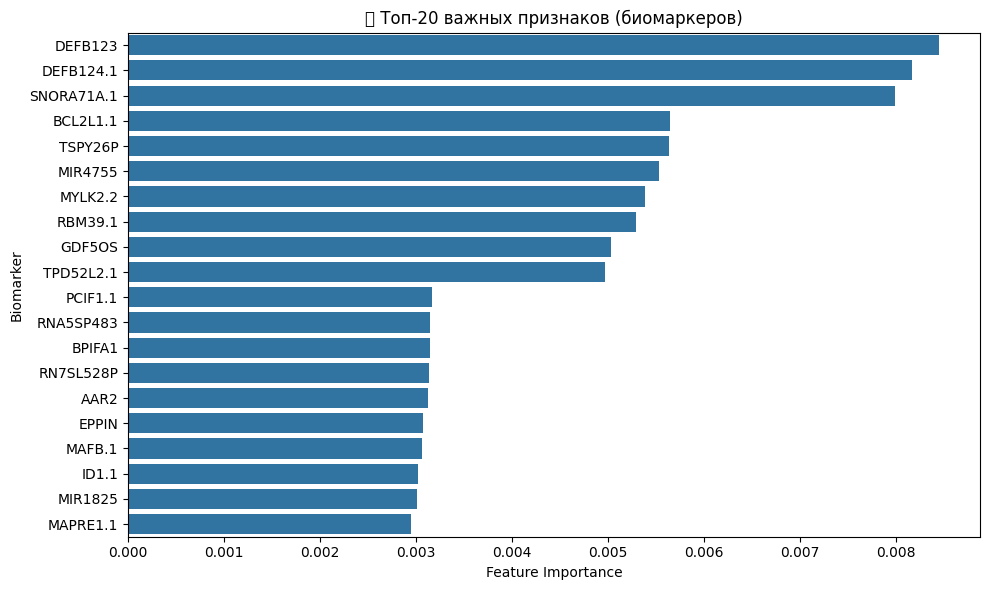

<ipython-input-7-87288159f8b2>:115: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


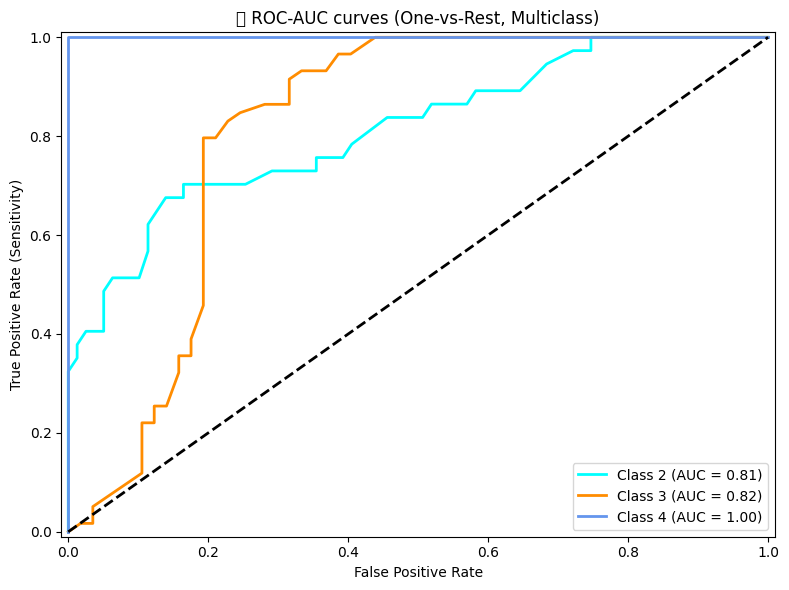


📊 Биостатистические метрики по классам:
 Class  Sensitivity (Recall)  Specificity  Precision (PPV)   NPV  F1-score   MCC
     2                 0.514        0.924            0.760 0.802     0.613 0.496
     3                 0.898        0.684            0.746 0.867     0.815 0.598
     4                 1.000        1.000            1.000 1.000     1.000 1.000

💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_multiclass_classification.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    balanced_accuracy_score, matthews_corrcoef
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from imblearn.over_sampling import RandomOverSampler  # 🔁 Добавили для асеплирования

# 1. Используем сбалансированный датафрейм
df = df_balanced.copy()

# 2. One-hot кодирование категориальных признаков (если ещё не сделано)
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)

# 3. Отделим признаки и целевую переменную
y = df['pathology_T_stage']
X = df.drop(columns=['pathology_T_stage'])

# 4. Делим на обучение и тест
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Кросс-валидация
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    # 🔁 Асеплирование только на трейне
    ros = RandomOverSampler(random_state=42)
    X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

    model = RandomForestClassifier(
        n_estimators=100, class_weight='balanced', random_state=42
    )
    model.fit(X_train_res, y_train_res)

    y_pred = model.predict(X_val)

    print("🎯 Accuracy:", accuracy_score(y_val, y_pred))
    print("📈 Balanced Accuracy:", balanced_accuracy_score(y_val, y_pred))
    print("📉 MCC:", matthews_corrcoef(y_val, y_pred))
    print("\n📋 Classification Report:\n", classification_report(y_val, y_pred, zero_division=0))

    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.tight_layout()
    plt.show()

# 6. Финальная модель на всём трейне (с асеплированием)
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train_full, y_train_full)

final_model = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42
)
final_model.fit(X_train_res, y_train_res)
final_preds = final_model.predict(X_test)

print("\n✅ Final Test Accuracy:", accuracy_score(y_test, final_preds))
print("📈 Final Balanced Accuracy:", balanced_accuracy_score(y_test, final_preds))
print("📉 Final MCC:", matthews_corrcoef(y_test, final_preds))
print("\n📋 Final Classification Report:\n", classification_report(y_test, final_preds, zero_division=0))

# 7. Важные признаки
importances = final_model.feature_importances_
top_indices = importances.argsort()[-20:][::-1]
top_features = [X.columns[i] for i in top_indices]
top_scores = importances[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("🔬 Топ-20 важных признаков (биомаркеров)")
plt.xlabel("Feature Importance")
plt.ylabel("Biomarker")
plt.tight_layout()
plt.show()

# ROC-AUC (One-vs-Rest)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = final_model.predict_proba(X_test)

n_classes = y_test_bin.shape[1]
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("🏁 ROC-AUC curves (One-vs-Rest, Multiclass)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 8. Биостатистика по классам
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_multiclass_biostats(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    results = []

    for idx, cls in enumerate(labels):
        tp = cm[idx, idx]
        fn = cm[idx, :].sum() - tp
        fp = cm[:, idx].sum() - tp
        tn = cm.sum() - (tp + fn + fp)

        sensitivity = tp / (tp + fn) if (tp + fn) else 0
        specificity = tn / (tn + fp) if (tn + fp) else 0
        precision = tp / (tp + fp) if (tp + fp) else 0
        npv = tn / (tn + fn) if (tn + fn) else 0
        f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) else 0
        mcc = matthews_corrcoef((y_true == cls).astype(int), (y_pred == cls).astype(int))

        results.append({
            "Class": cls,
            "Sensitivity (Recall)": round(sensitivity, 3),
            "Specificity": round(specificity, 3),
            "Precision (PPV)": round(precision, 3),
            "NPV": round(npv, 3),
            "F1-score": round(f1, 3),
            "MCC": round(mcc, 3)
        })

    return pd.DataFrame(results)

labels = np.unique(y_test)
biostats_df = calculate_multiclass_biostats(y_test, final_preds, labels)

print("\n📊 Биостатистические метрики по классам:")
print(biostats_df.to_string(index=False))

# 9. Сохранение топ-20 биомаркеров
top_biomarkers_df = pd.DataFrame({
    "Biomarker": top_features,
    "Importance": top_scores
})
top_biomarkers_df.to_csv("top_20_biomarkers_multiclass_classification.csv", index=False)
print("\n💾 Топ-20 биомаркеров сохранены в 'top_20_biomarkers_multiclass_classification.csv'")

## Ресемплинг с помощью SMOTE




--- Fold 1 ---
🎯 Accuracy: 0.717948717948718
📈 Balanced Accuracy: 0.46950354609929074
📉 MCC: 0.4056764243680247

📋 Classification Report:
               precision    recall  f1-score   support

          t2       0.67      0.60      0.63        30
          t3       0.75      0.81      0.78        47
          t4       0.00      0.00      0.00         1

    accuracy                           0.72        78
   macro avg       0.47      0.47      0.47        78
weighted avg       0.71      0.72      0.71        78



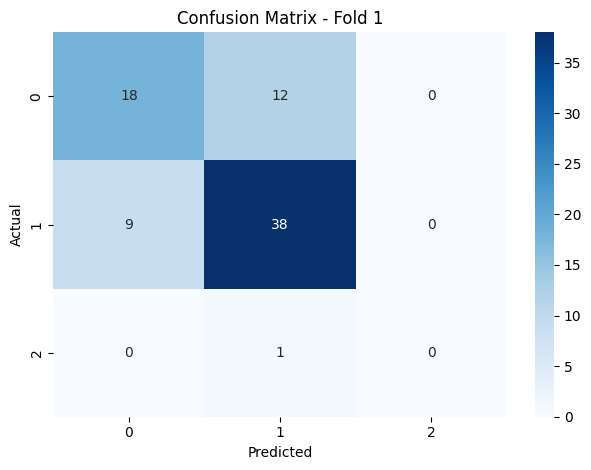


--- Fold 2 ---
🎯 Accuracy: 0.717948717948718
📈 Balanced Accuracy: 0.46950354609929074
📉 MCC: 0.4056764243680247

📋 Classification Report:
               precision    recall  f1-score   support

          t2       0.67      0.60      0.63        30
          t3       0.75      0.81      0.78        47
          t4       0.00      0.00      0.00         1

    accuracy                           0.72        78
   macro avg       0.47      0.47      0.47        78
weighted avg       0.71      0.72      0.71        78



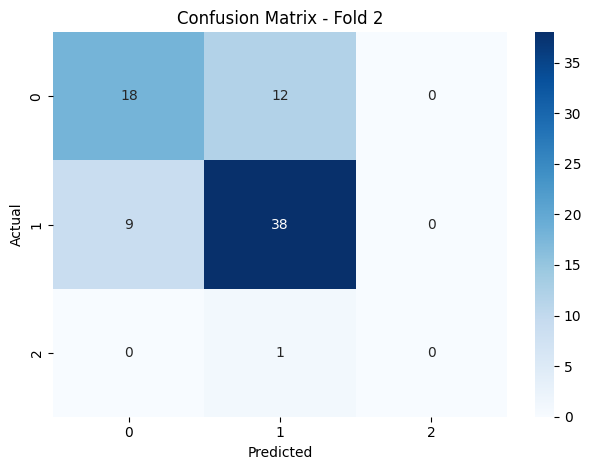


--- Fold 3 ---
🎯 Accuracy: 0.6538461538461539
📈 Balanced Accuracy: 0.42773294203961854
📉 MCC: 0.2725021573172849

📋 Classification Report:
               precision    recall  f1-score   support

          t2       0.58      0.52      0.55        29
          t3       0.69      0.77      0.73        47
          t4       0.00      0.00      0.00         2

    accuracy                           0.65        78
   macro avg       0.42      0.43      0.42        78
weighted avg       0.63      0.65      0.64        78



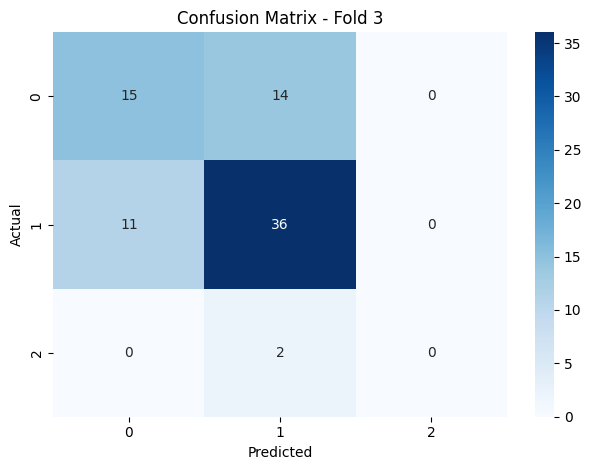


--- Fold 4 ---
🎯 Accuracy: 0.5641025641025641
📈 Balanced Accuracy: 0.35607728050868187
📉 MCC: 0.07065231188657234

📋 Classification Report:
               precision    recall  f1-score   support

          t2       0.42      0.34      0.38        29
          t3       0.63      0.72      0.67        47
          t4       0.00      0.00      0.00         2

    accuracy                           0.56        78
   macro avg       0.35      0.36      0.35        78
weighted avg       0.53      0.56      0.55        78



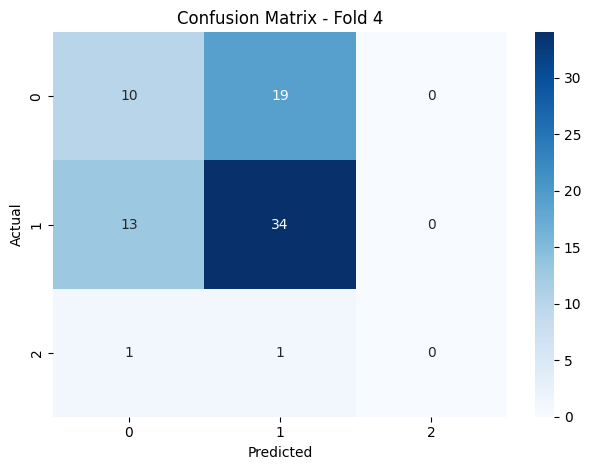


--- Fold 5 ---
🎯 Accuracy: 0.6363636363636364
📈 Balanced Accuracy: 0.4053140096618358
📉 MCC: 0.22271801195816082

📋 Classification Report:
               precision    recall  f1-score   support

          t2       0.57      0.43      0.49        30
          t3       0.67      0.78      0.72        46
          t4       0.00      0.00      0.00         1

    accuracy                           0.64        77
   macro avg       0.41      0.41      0.40        77
weighted avg       0.62      0.64      0.62        77



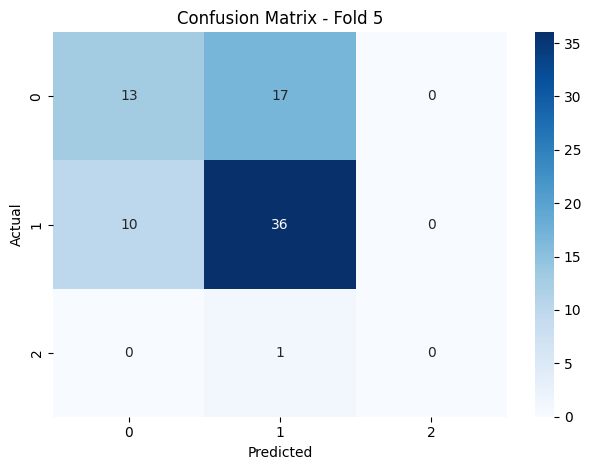


✅ Final Test Accuracy: 0.7653061224489796
📈 Final Balanced Accuracy: 0.49763322644678576
📉 Final MCC: 0.5061308339279791
📋 Final Classification Report:
               precision    recall  f1-score   support

          t2       0.79      0.59      0.68        37
          t3       0.76      0.90      0.82        59
          t4       0.00      0.00      0.00         2

    accuracy                           0.77        98
   macro avg       0.51      0.50      0.50        98
weighted avg       0.75      0.77      0.75        98



<ipython-input-14-fcc3fa80de85>:99: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


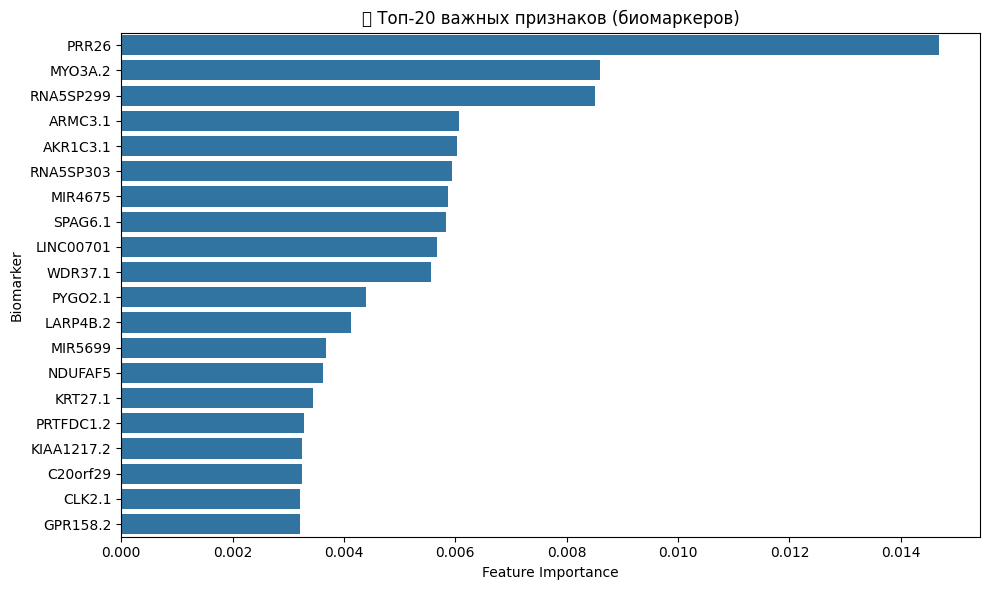

<ipython-input-14-fcc3fa80de85>:125: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127937 (\N{CHEQUERED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


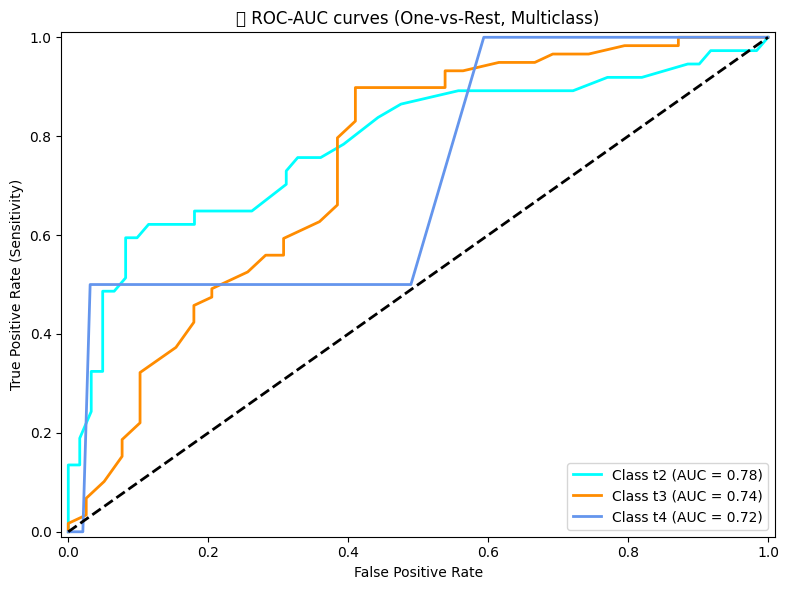

In [ ]:
# 1. Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, matthews_corrcoef,
    classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from collections import Counter

# 2. Загрузка датафрейма
df = pd.read_csv('/content/cleaned_normalized_data.csv', index_col=0)

# 3. Сохраняем целевую переменную до one-hot кодирования
target_col = 'pathology_T_stage'
y = df[target_col]
X = df.drop(columns=[target_col])

# 4. One-hot кодируем категориальные признаки
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols)

# 5. Делим на обучающую и тестовую выборки
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# 6. Кросс-валидация с SMOTE
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    print(f"\n--- Fold {fold} ---")

    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    # 🔎 Находим минимальное количество сэмплов среди классов
    class_counts = Counter(y_train)
    min_class_count = min(class_counts.values())

    # ⚙️ SMOTE с динамическим k_neighbors
    smote = SMOTE(random_state=42, k_neighbors=min(5, min_class_count - 1))
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    model = RandomForestClassifier(
        n_estimators=100, class_weight='balanced', random_state=42
    )
    model.fit(X_train_res, y_train_res)

    y_pred = model.predict(X_val)

    print("🎯 Accuracy:", accuracy_score(y_val, y_pred))
    print("📈 Balanced Accuracy:", balanced_accuracy_score(y_val, y_pred))
    print("📉 MCC:", matthews_corrcoef(y_val, y_pred))
    print("\n📋 Classification Report:\n", classification_report(y_val, y_pred, zero_division=0))

    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.tight_layout()
    plt.show()


# 7. Финальная модель на полном обучающем наборе
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_full, y_train_full)

final_model = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42
)
final_model.fit(X_train_res, y_train_res)
final_preds = final_model.predict(X_test)

print("\n✅ Final Test Accuracy:", accuracy_score(y_test, final_preds))
print("📈 Final Balanced Accuracy:", balanced_accuracy_score(y_test, final_preds))
print("📉 Final MCC:", matthews_corrcoef(y_test, final_preds))
print("📋 Final Classification Report:\n", classification_report(y_test, final_preds, zero_division=0))

# 8. Важные признаки
importances = final_model.feature_importances_
top_indices = importances.argsort()[-20:][::-1]
top_features = [X.columns[i] for i in top_indices]
top_scores = importances[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("🔬 Топ-20 важных признаков (биомаркеров)")
plt.xlabel("Feature Importance")
plt.ylabel("Biomarker")
plt.tight_layout()
plt.show()

# 9. ROC-кривые
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = final_model.predict_proba(X_test)

n_classes = y_test_bin.shape[1]
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])

plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("🏁 ROC-AUC curves (One-vs-Rest, Multiclass)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Улучшение бинарное классификации с помощью изменения гиперпараметров

<ipython-input-4-f76727c94a00>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pathology_T_stage'] = df['pathology_T_stage'].astype(int)


Fitting 3 folds for each of 16 candidates, totalling 48 fits

✅ Лучшие параметры: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__n_estimators': 100}

📋 Classification Report:
               precision    recall  f1-score   support

           2       0.71      0.41      0.52        37
           3       0.71      0.90      0.79        59

    accuracy                           0.71        96
   macro avg       0.71      0.65      0.65        96
weighted avg       0.71      0.71      0.69        96

Accuracy: 0.708
Sensitivity (Recall): 0.898
Specificity: 0.405
PPV (Precision): 0.707
NPV: 0.714
F1-score: 0.791
MCC: 0.358


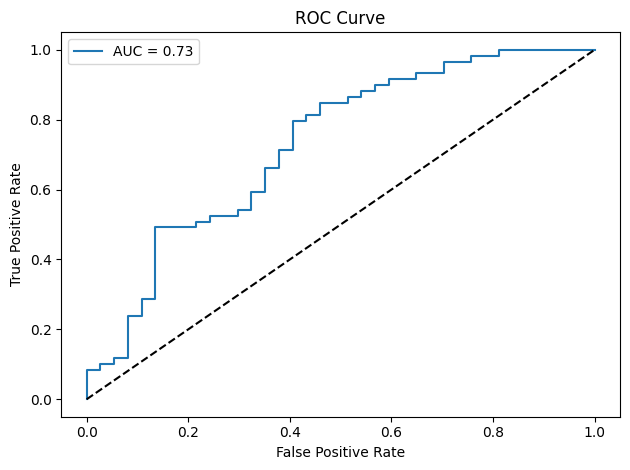

<ipython-input-4-f76727c94a00>:119: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


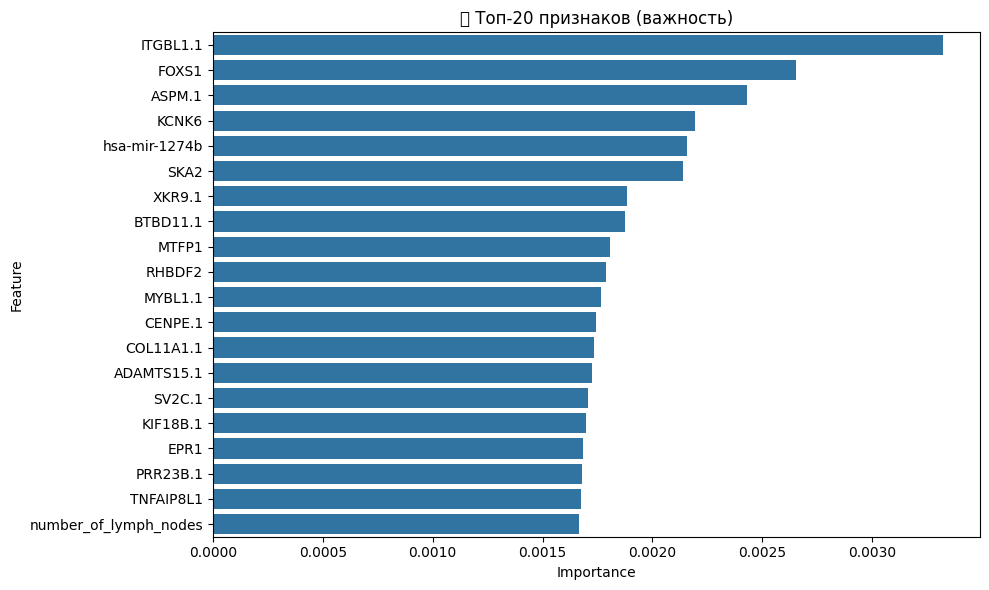


📁 Сохранено: top_20_biomarkers_binary_classification.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    matthews_corrcoef, roc_auc_score, roc_curve
)

from sklearn.pipeline import Pipeline

# 🔢 Метрики
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) != 0 else 0
    mcc = matthews_corrcoef(y_true, y_pred)

    return {
        'Accuracy': accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'PPV (Precision)': ppv,
        'NPV': npv,
        'F1-score': f1,
        'MCC': mcc
    }

# 📂 Загрузка и подготовка данных
df = pd.read_csv('/content/cleaned_normalized_data.csv', index_col=0)
df['pathology_T_stage'] = df['pathology_T_stage'].replace({'t2': 2, 't3': 3})
df = df[df['pathology_T_stage'].isin([2, 3])]
df['pathology_T_stage'] = df['pathology_T_stage'].astype(int)

categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)

y = df['pathology_T_stage']
X = df.drop(columns=['pathology_T_stage'])

# 🚂 Делим выборку
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 📌 Grid по минимуму — быстрее
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, None],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt', 'log2'],
}

# 🔁 Pipeline с отбором признаков
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

pipeline = Pipeline([
    ('selector', selector),
    ('rf', RandomForestClassifier(random_state=42))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_full, y_train_full)

print("\n✅ Лучшие параметры:", grid_search.best_params_)

# 🎯 Финальная модель
final_model = grid_search.best_estimator_
final_model.fit(X_train_full, y_train_full)
y_pred = final_model.predict(X_test)

print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
metrics = calculate_metrics(y_test, y_pred)
for k, v in metrics.items():
    print(f"{k}: {v:.3f}")

# 🔵 ROC-AUC
if hasattr(final_model.named_steps['rf'], "predict_proba"):
    probs = final_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs, pos_label=3)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 📌 Топ 20 признаков
selector = final_model.named_steps['selector']
rf_model = final_model.named_steps['rf']

selected_features = X.columns[selector.get_support()]
importances = rf_model.feature_importances_

top_indices = np.argsort(importances)[-20:][::-1]
top_features = selected_features[top_indices]
top_scores = importances[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("🔬 Топ-20 признаков (важность)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 💾 Сохраняем признаки
pd.DataFrame({
    "Biomarker": top_features,
    "Importance": top_scores
}).to_csv("top_20_biomarkers_binary_classification.csv", index=False)

print("\n📁 Сохранено: top_20_biomarkers_binary_classification.csv")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    matthews_corrcoef, roc_auc_score, roc_curve
)

# 📊 Метрики
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    ppv = tp / (tp + fp) if (tp + fp) != 0 else 0
    npv = tn / (tn + fn) if (tn + fn) != 0 else 0
    f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) != 0 else 0
    mcc = matthews_corrcoef(y_true, y_pred)

    return {
        'Accuracy': accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity,
        'PPV (Precision)': ppv,
        'NPV': npv,
        'F1-score': f1,
        'MCC': mcc
    }

# 📂 Загрузка и подготовка данных
df = pd.read_csv('/content/cleaned_normalized_data.csv', index_col=0)
df['pathology_T_stage'] = df['pathology_T_stage'].replace({'t2': 0, 't3': 1})
df = df[df['pathology_T_stage'].isin([0, 1])]
df['pathology_T_stage'] = df['pathology_T_stage'].astype(int)

categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)

y = df['pathology_T_stage']
X = df.drop(columns=['pathology_T_stage'])

# 🚂 Тестовый сплит
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🔧 Гиперпараметры
param_grid = {
    'rf__n_estimators': [100],
    'rf__max_depth': [10, 15],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt']
}

# ⚙️ Pipeline с RFECV
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
selector = RFECV(estimator=rf_clf, step=1, cv=3, scoring='f1', n_jobs=-1)

pipeline = Pipeline([
    ('selector', selector),
    ('rf', rf_clf)
])

# 🔁 Внешняя кросс-валидация
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics_list = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_full, y_train_full), 1):
    print(f"\n🔁 Fold {fold}")
    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full.iloc[train_idx], y_train_full.iloc[val_idx]

    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)

    fold_metrics = calculate_metrics(y_val, y_pred)
    print(classification_report(y_val, y_pred, zero_division=0))
    for k, v in fold_metrics.items():
        print(f"{k}: {v:.3f}")

    metrics_list.append(fold_metrics)

# 📊 Средние метрики
mean_metrics = pd.DataFrame(metrics_list).mean()
print("\n📈 Средние метрики по 5 фолдам:")
for k, v in mean_metrics.items():
    print(f"{k}: {v:.3f}")

# 🎯 Финальная модель
final_grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
final_grid.fit(X_train_full, y_train_full)

final_model = final_grid.best_estimator_
print("\n✅ Лучшие параметры:", final_grid.best_params_)

# 🧪 Финальный тест
y_pred = final_model.predict(X_test)
print("\n📋 Classification Report на X_test:\n", classification_report(y_test, y_pred, zero_division=0))

test_metrics = calculate_metrics(y_test, y_pred)
for k, v in test_metrics.items():
    print(f"{k}: {v:.3f}")

# 🔵 ROC-AUC
if hasattr(final_model.named_steps['rf'], "predict_proba"):
    probs = final_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs, pos_label=1)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 📌 Топ признаков
selector_model = final_model.named_steps['selector']
rf_model = final_model.named_steps['rf']

selected_features = X.columns[selector_model.support_]
importances = rf_model.feature_importances_

top_indices = np.argsort(importances)[-20:][::-1]
top_features = selected_features[top_indices]
top_scores = importances[top_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features)
plt.title("🔬 Топ-20 признаков (важность)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 💾 Сохранение
pd.DataFrame({
    "Biomarker": top_features,
    "Importance": top_scores
}).to_csv("top_20_biomarkers_binary_classification.csv", index=False)

print("\n📁 Сохранено: top_20_biomarkers_binary_classification.csv")


🔁 Fold 1


KeyboardInterrupt: 